In [1]:
#!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn import cluster
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
def plotGrid(x, y, dataframe, hue, dimensions, export_path, plotFactory):
 
    fig, axs = plt.subplots(dimensions[0], dimensions[1], figsize=(250,250))
 
    for ax_y in range(0, dimensions[1]):
        for ax_x in range(0, dimensions[0]):
            
            idx = (ax_y * dimensions[0]) + ax_x
            
            if(idx >= len(hue)):
                axs[ax_y, ax_x].axis('off')
            
            else:
                print('plot %d: %s' % (idx, hue[idx]))
                
 
                col = dataframe[hue[idx]]
 
                axs[ax_x, ax_y].set_title(hue[idx])
                plotFactory(x=x, y=y, hue=col, ax=axs[ax_x, ax_y])
 
    plt.savefig(
        export_path,
        format="png", 
        dpi=200
        )
    plt.close(fig)


In [4]:
df = pd.read_csv('../Exports/CSV/other_columns.csv', index_col=0)
df

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,age,CHILDREN,ses,rurality,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR
1,1.672098,0.477121,1.194977,1.505150,1.113943,1.079181,0.778151,0.000000,1.000000,1.397940,...,5.459432,1,1,2,0,0,0,0,-1,0
3,2.037426,1.204120,0.833307,1.819544,1.146128,1.431364,0.778151,0.845098,0.301030,1.041393,...,6.087463,0,2,4,0,0,0,0,-1,0
4,2.404834,1.568202,0.836632,2.053078,1.397940,1.633468,1.000000,0.903090,0.477121,1.176091,...,6.247928,1,2,2,1,1,0,0,-1,0
6,2.029384,1.146128,0.883256,1.799341,0.954243,1.414973,0.602060,0.903090,0.477121,1.079181,...,5.169925,1,2,3,0,0,0,0,-1,0
11,1.397940,0.301030,1.096910,1.230449,1.079181,0.903090,0.778151,0.301030,1.000000,1.176091,...,6.189825,0,2,2,0,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,2.143015,1.079181,1.063834,1.707570,0.903090,1.342423,0.602060,0.778151,0.477121,1.301030,...,5.807355,0,2,4,0,0,0,0,-1,0
95404,1.770852,1.000000,0.770852,1.579784,1.079181,1.230449,0.778151,0.903090,0.477121,1.041393,...,5.672425,1,2,4,0,0,0,0,-1,0
95406,1.908485,1.380211,0.528274,1.770852,1.079181,1.361728,0.698970,1.079181,0.301030,0.954243,...,5.584963,0,2,2,0,0,0,0,-1,0
95410,2.697229,1.612784,1.084445,2.103804,1.491362,1.556303,0.954243,1.255273,0.698970,1.322219,...,5.807355,0,1,1,1,0,0,0,-1,0


# Before Scaling

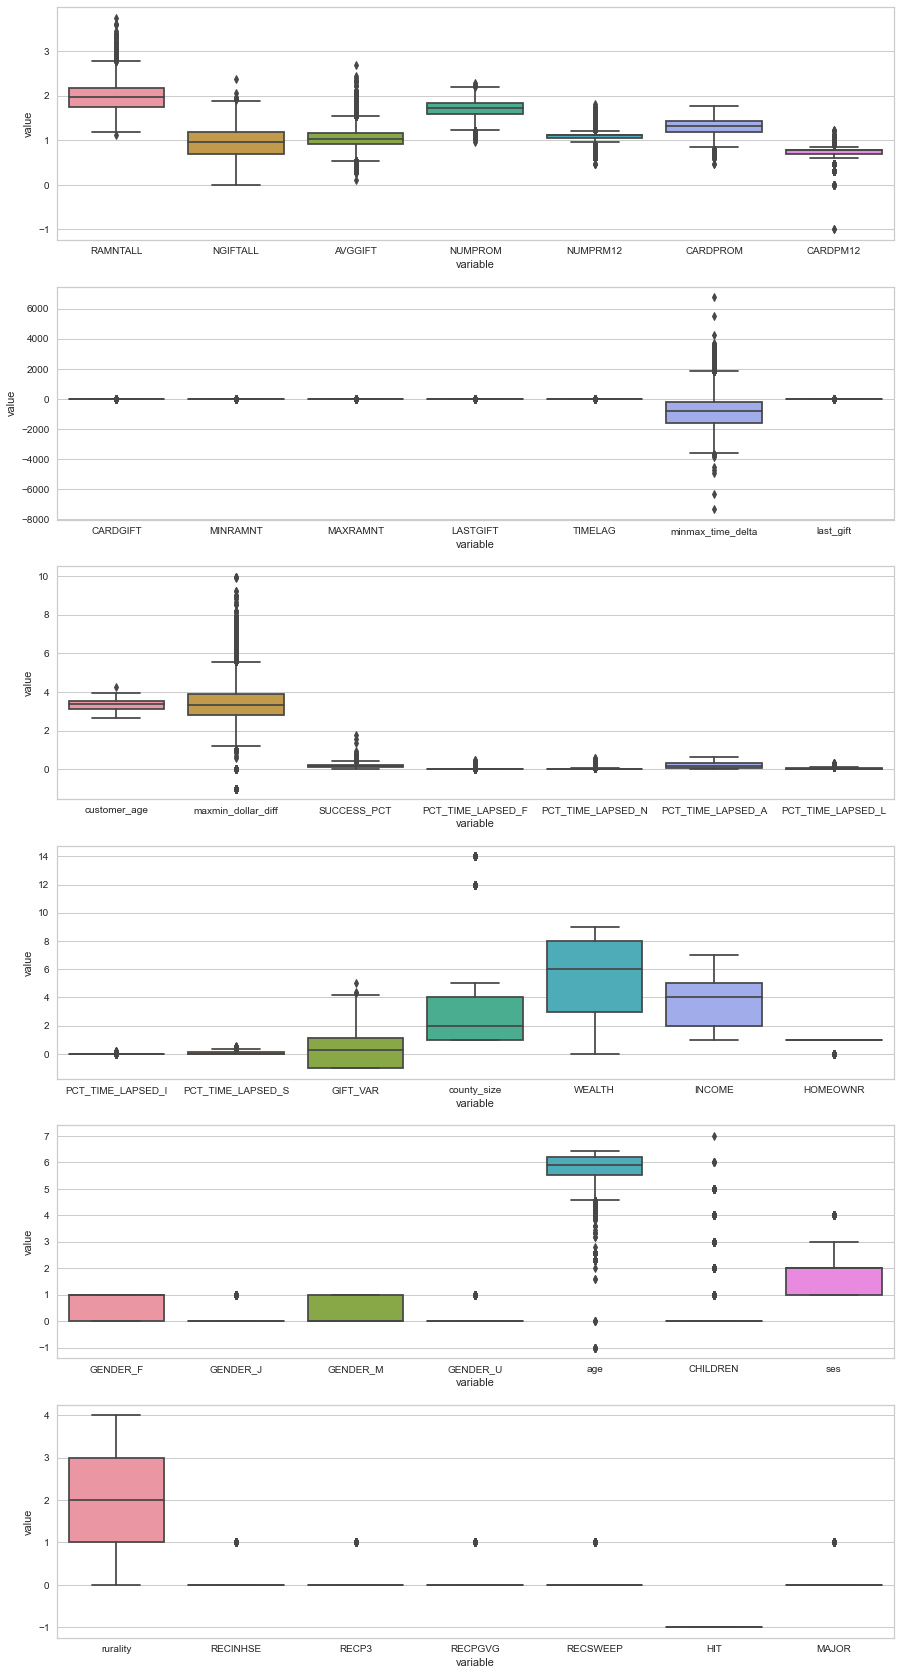

In [5]:
fig, ax = plt.subplots(6,1,figsize=(15,30))

sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,:7]), ax =ax[0] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,7:14]), ax =ax[1] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,14:21]), ax =ax[2] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,21:28]), ax =ax[3] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,28:35]), ax =ax[4] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,35:42]), ax =ax[5] )

plt.savefig('../Exports/Images/FinalGraphs/rescaled_boxplot')

pre_scaled_df = df.copy()

# After scaling  and NaN removal


In [6]:
df.dropna(inplace=True)

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns = df.columns, index = df.index)
scaled_df

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,age,CHILDREN,ses,rurality,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR
1,-0.976386,-1.406364,0.761336,-1.042100,0.073456,-1.203812,0.469258,-1.462796,0.992516,0.760394,...,-0.628419,1.004497,-1.212323,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920
3,0.227235,0.835422,-0.963007,0.690595,0.343023,0.800863,0.469258,0.545795,-1.197044,-0.921244,...,0.538260,-0.426405,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920
4,1.437704,1.958111,-0.947152,1.977656,2.452111,1.951273,2.899786,0.683627,-0.645429,-0.285945,...,0.836351,1.004497,0.158682,-0.119974,3.296185,6.651218,-0.033474,-0.126903,0.0,-0.059920
6,0.200737,0.656597,-0.724863,0.579250,-1.264142,0.707566,-1.459962,0.683627,-0.645429,-0.743016,...,-1.166228,1.004497,0.158682,0.647054,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920
11,-1.879633,-1.949362,0.293782,-2.556039,-0.217700,-2.206149,0.469258,-0.747321,0.992516,-0.285945,...,0.728414,-0.426405,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0.575109,0.450159,0.136082,0.073483,-1.692578,0.294597,-1.459962,0.386679,-0.645429,0.303323,...,0.017910,-0.426405,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920
95404,-0.651028,0.205994,-1.260773,-0.630778,-0.217700,-0.342774,0.469258,0.683627,-0.645429,-0.921244,...,-0.232746,1.004497,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920
95406,-0.197579,1.378420,-2.417319,0.422243,-0.217700,0.404485,-0.398236,1.102153,-1.197044,-1.332283,...,-0.395223,-0.426405,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920
95410,2.401038,2.095585,0.234354,2.257214,3.234578,1.512033,2.398477,1.520678,0.049524,0.403261,...,0.017910,-0.426405,-1.212323,-0.887001,3.296185,-0.150348,-0.033474,-0.126903,0.0,-0.059920


In [8]:
pre_scaled_df = df.copy()

In [9]:
df= scaled_df

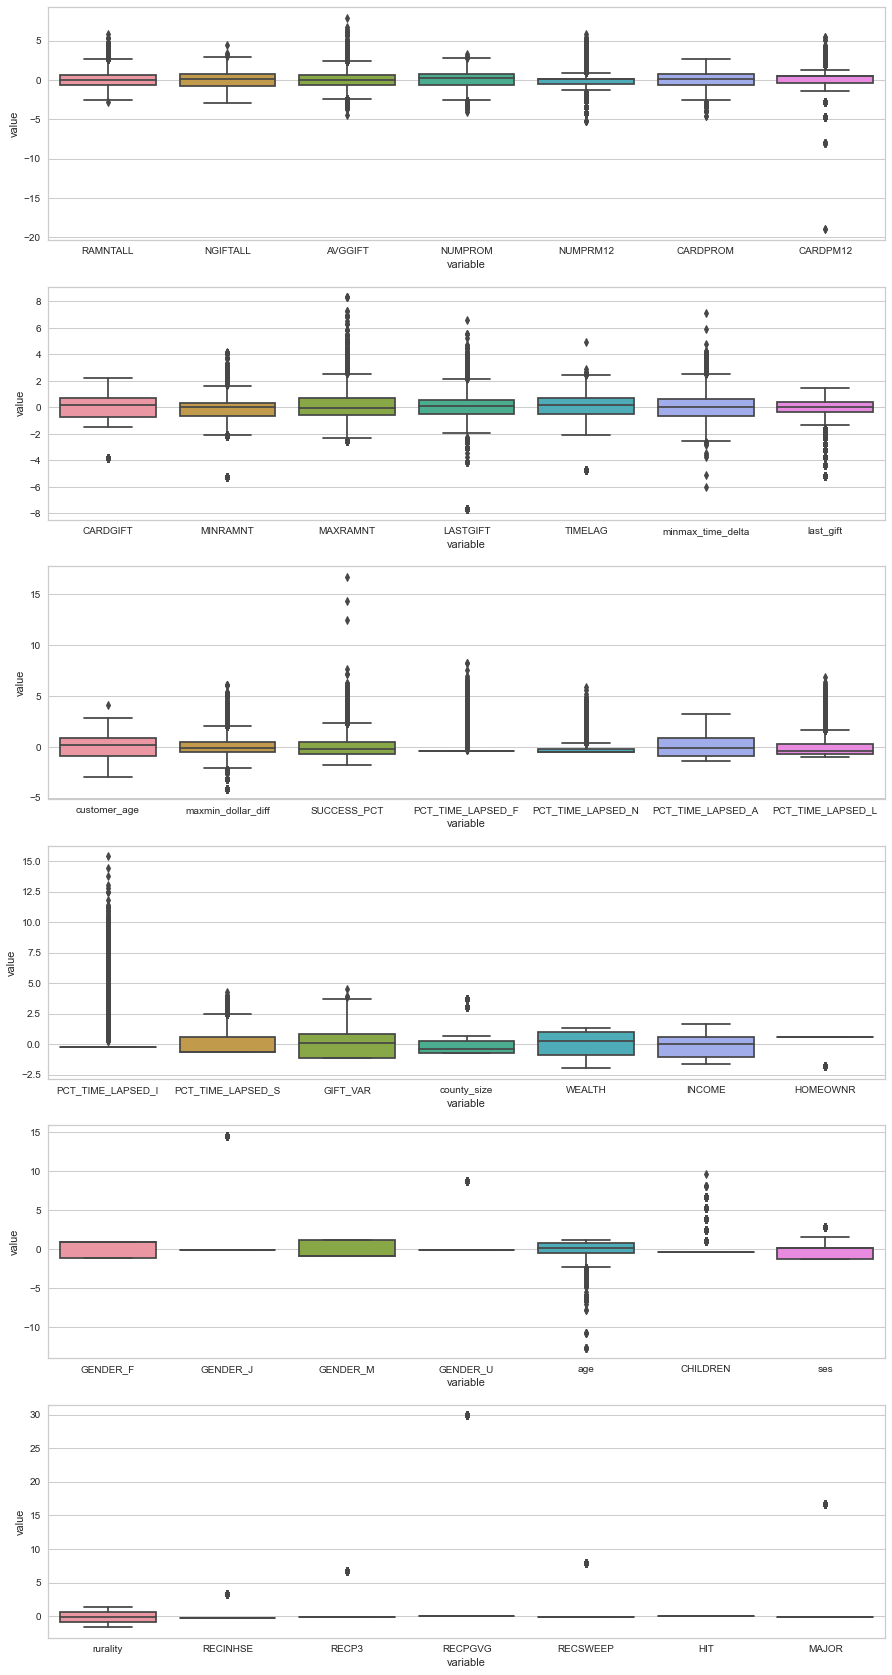

In [10]:
fig, ax = plt.subplots(6,1,figsize=(15,30))

sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,:7]), ax =ax[0] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,7:14]), ax =ax[1] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,14:21]), ax =ax[2] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,21:28]), ax =ax[3] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,28:35]), ax =ax[4] )
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,35:42]), ax =ax[5] )

plt.savefig('../Exports/Images/FinalGraphs/rescaled_boxplot')

In [11]:
gender = ['GENDER_F', 'GENDER_J', 'GENDER_M', 'GENDER_U']

In [12]:
pre_scaled_df.describe()['maxmin_dollar_diff']

count    50034.000000
mean         3.400846
std          1.075349
min         -1.000000
25%          2.807355
50%          3.321928
75%          3.906891
max          9.961450
Name: maxmin_dollar_diff, dtype: float64

## Find optimal elbow point

In [13]:
def elbow_model_plot(model, df):
    # Generate synthetic dataset with 8 random clusters
    X = df

    ncols = len(df.columns)
    visualizer = KElbowVisualizer(model, k=(1,10))

    visualizer.fit(X)    
    visualizer.show()

In [14]:
estimator = cluster.KMeans(
    init='k-means++',
    n_clusters = 3,
    max_iter = 500,
    tol= 1e-4,
    random_state = 27,
)

# All columns

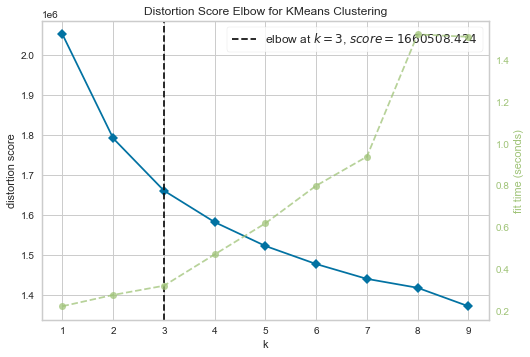

In [15]:
elbow_model_plot(estimator, df)

In [16]:
wip_df = df.copy()
clustered_columns = []

In [17]:
df.columns

Index(['RAMNTALL', 'NGIFTALL', 'AVGGIFT', 'NUMPROM', 'NUMPRM12', 'CARDPROM',
       'CARDPM12', 'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'TIMELAG',
       'minmax_time_delta', 'last_gift', 'customer_age', 'maxmin_dollar_diff',
       'SUCCESS_PCT', 'PCT_TIME_LAPSED_F', 'PCT_TIME_LAPSED_N',
       'PCT_TIME_LAPSED_A', 'PCT_TIME_LAPSED_L', 'PCT_TIME_LAPSED_I',
       'PCT_TIME_LAPSED_S', 'GIFT_VAR', 'county_size', 'WEALTH', 'INCOME',
       'HOMEOWNR', 'GENDER_F', 'GENDER_J', 'GENDER_M', 'GENDER_U', 'age',
       'CHILDREN', 'ses', 'rurality', 'RECINHSE', 'RECP3', 'RECPGVG',
       'RECSWEEP', 'HIT', 'MAJOR'],
      dtype='object')

In [18]:
transactions = ['RAMNTALL', 'NGIFTALL', 'AVGGIFT', 'NUMPROM', 'NUMPRM12', 'CARDPROM',
       'CARDPM12', 'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'GIFT_VAR', 'maxmin_dollar_diff']

current_spending = [
                   ]

status= ['PCT_TIME_LAPSED_F', 'PCT_TIME_LAPSED_N',
       'PCT_TIME_LAPSED_A', 'PCT_TIME_LAPSED_L', 'PCT_TIME_LAPSED_I',
       'PCT_TIME_LAPSED_S']

wealth = [ 'WEALTH', 
           'HOMEOWNR', 'rurality', 'ses','SUCCESS_PCT']

personal = ['age', 'CHILDREN', 'HIT','customer_age']

internal = ['RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP','MAJOR']

# Promotions and Transactions

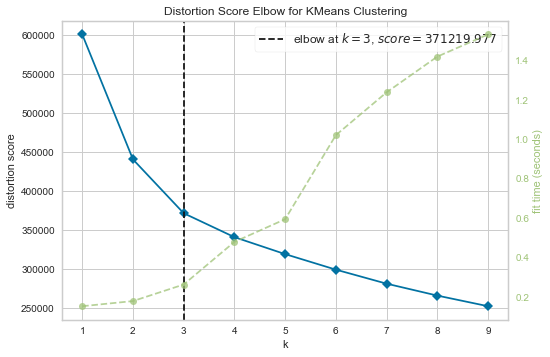

In [19]:
columns = transactions
elbow_model_plot(cluster.KMeans(), df[columns])

In [20]:
estimator = cluster.KMeans(
    init='k-means++',
    n_clusters = 3,
    max_iter = 500,
    tol= 1e-4,
    random_state = 27,
    n_jobs = -1
)

estimator.fit_transform(df[columns])

new_column = 'transactions_clustered'
clustered_columns.append(new_column)
wip_df[new_column] = estimator.labels_
wip_df

C:\Users\josem\.conda\envs\python-standard\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,CHILDREN,ses,rurality,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR,transactions_clustered
1,-0.976386,-1.406364,0.761336,-1.042100,0.073456,-1.203812,0.469258,-1.462796,0.992516,0.760394,...,1.004497,-1.212323,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,2
3,0.227235,0.835422,-0.963007,0.690595,0.343023,0.800863,0.469258,0.545795,-1.197044,-0.921244,...,-0.426405,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,1
4,1.437704,1.958111,-0.947152,1.977656,2.452111,1.951273,2.899786,0.683627,-0.645429,-0.285945,...,1.004497,0.158682,-0.119974,3.296185,6.651218,-0.033474,-0.126903,0.0,-0.059920,0
6,0.200737,0.656597,-0.724863,0.579250,-1.264142,0.707566,-1.459962,0.683627,-0.645429,-0.743016,...,1.004497,0.158682,0.647054,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,1
11,-1.879633,-1.949362,0.293782,-2.556039,-0.217700,-2.206149,0.469258,-0.747321,0.992516,-0.285945,...,-0.426405,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0.575109,0.450159,0.136082,0.073483,-1.692578,0.294597,-1.459962,0.386679,-0.645429,0.303323,...,-0.426405,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,1
95404,-0.651028,0.205994,-1.260773,-0.630778,-0.217700,-0.342774,0.469258,0.683627,-0.645429,-0.921244,...,1.004497,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,1
95406,-0.197579,1.378420,-2.417319,0.422243,-0.217700,0.404485,-0.398236,1.102153,-1.197044,-1.332283,...,-0.426405,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,1
95410,2.401038,2.095585,0.234354,2.257214,3.234578,1.512033,2.398477,1.520678,0.049524,0.403261,...,-0.426405,-1.212323,-0.887001,3.296185,-0.150348,-0.033474,-0.126903,0.0,-0.059920,0


In [21]:
transaction_clusters = {2:'sporadic_low_value_donators', 1: 'high_freq_low_amount_donators', 0:'avg_freq_high_amount_amount_donators'}
wip_df['transactions_clustered'].replace(transaction_clusters, inplace=True)

In [22]:
wip_df

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,CHILDREN,ses,rurality,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR,transactions_clustered
1,-0.976386,-1.406364,0.761336,-1.042100,0.073456,-1.203812,0.469258,-1.462796,0.992516,0.760394,...,1.004497,-1.212323,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators
3,0.227235,0.835422,-0.963007,0.690595,0.343023,0.800863,0.469258,0.545795,-1.197044,-0.921244,...,-0.426405,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators
4,1.437704,1.958111,-0.947152,1.977656,2.452111,1.951273,2.899786,0.683627,-0.645429,-0.285945,...,1.004497,0.158682,-0.119974,3.296185,6.651218,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators
6,0.200737,0.656597,-0.724863,0.579250,-1.264142,0.707566,-1.459962,0.683627,-0.645429,-0.743016,...,1.004497,0.158682,0.647054,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators
11,-1.879633,-1.949362,0.293782,-2.556039,-0.217700,-2.206149,0.469258,-0.747321,0.992516,-0.285945,...,-0.426405,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0.575109,0.450159,0.136082,0.073483,-1.692578,0.294597,-1.459962,0.386679,-0.645429,0.303323,...,-0.426405,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators
95404,-0.651028,0.205994,-1.260773,-0.630778,-0.217700,-0.342774,0.469258,0.683627,-0.645429,-0.921244,...,1.004497,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators
95406,-0.197579,1.378420,-2.417319,0.422243,-0.217700,0.404485,-0.398236,1.102153,-1.197044,-1.332283,...,-0.426405,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators
95410,2.401038,2.095585,0.234354,2.257214,3.234578,1.512033,2.398477,1.520678,0.049524,0.403261,...,-0.426405,-1.212323,-0.887001,3.296185,-0.150348,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators


<AxesSubplot:xlabel='transactions_clustered'>

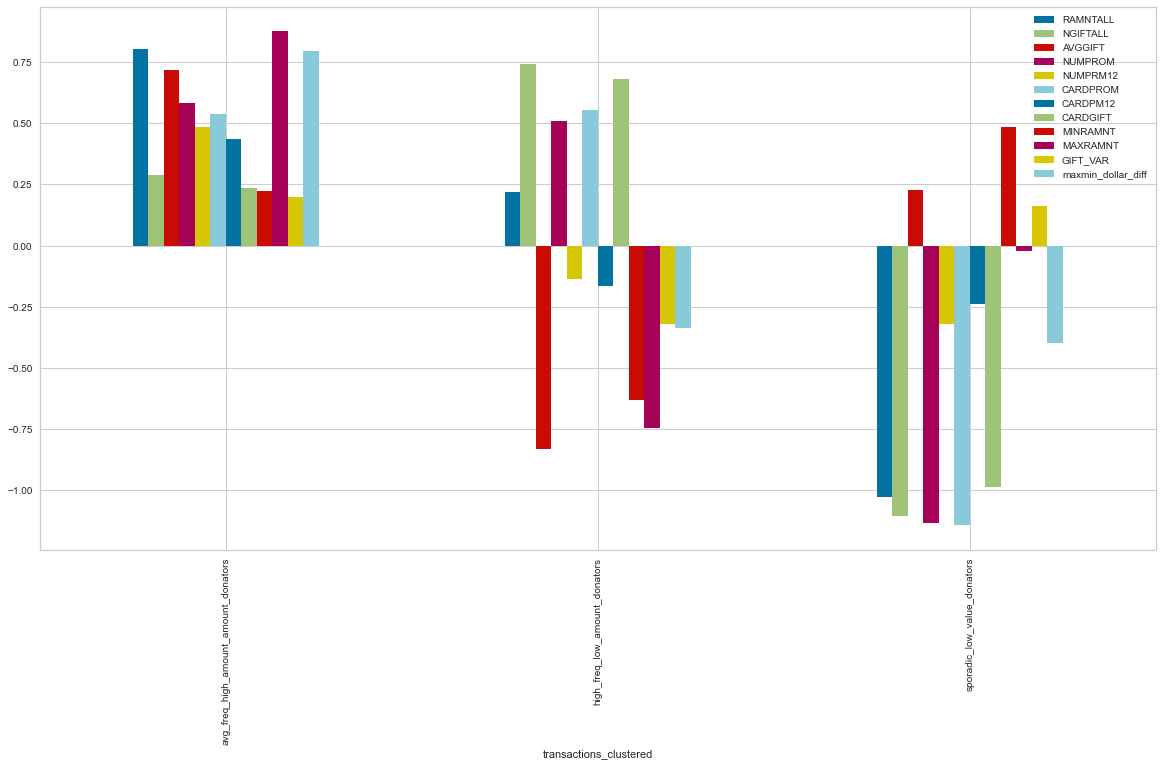

In [23]:
wip_df[columns + [new_column]].groupby(new_column).mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='transactions_clustered'>

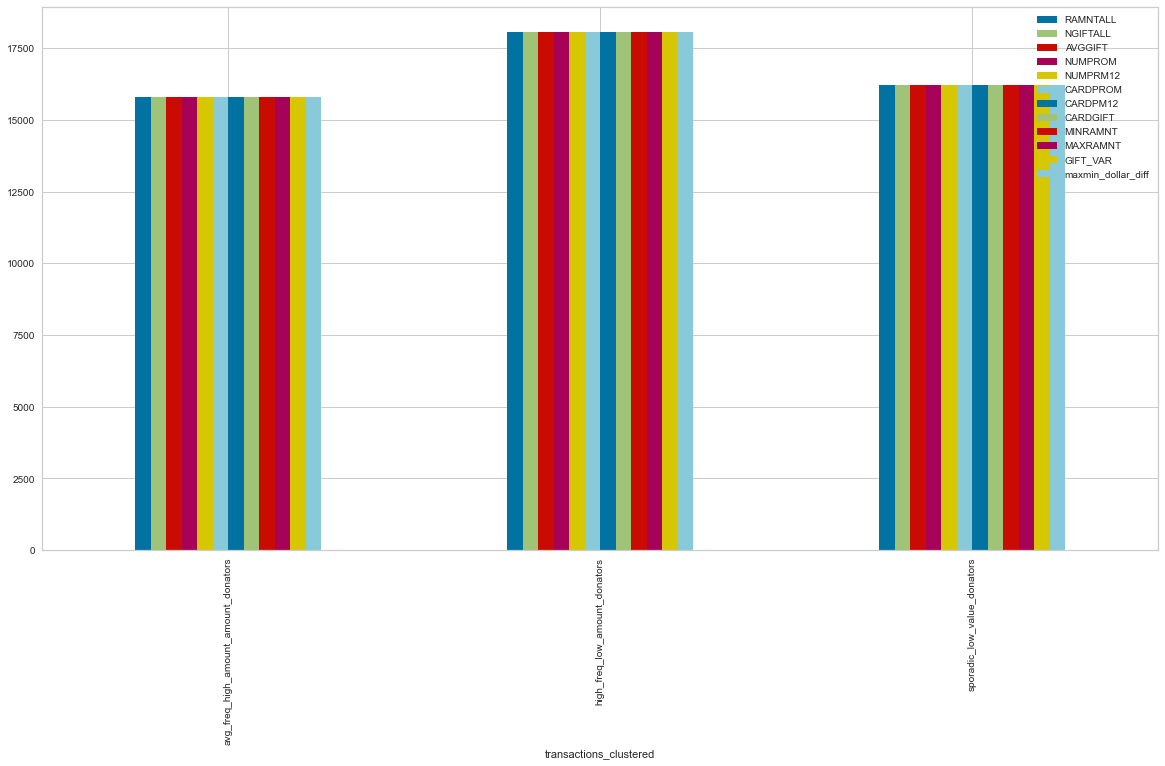

In [24]:
wip_df[columns + [new_column]].groupby(new_column).count().plot.bar(figsize=(20,10))

# Status 

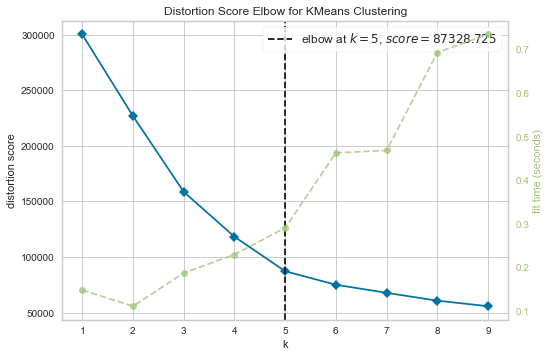

In [25]:
columns = status
elbow_model_plot(cluster.KMeans(), df[columns])

In [26]:
estimator = cluster.KMeans(
    init='k-means++',
    n_clusters = 4,
    max_iter = 500,
    tol= 1e-4,
    random_state = 27,
    n_jobs = -1
)

estimator.fit_transform(df[columns])

new_column = 'status_clustered'
clustered_columns.append(new_column)
wip_df[new_column] = estimator.labels_

wip_df

C:\Users\josem\.conda\envs\python-standard\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,ses,rurality,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR,transactions_clustered,status_clustered
1,-0.976386,-1.406364,0.761336,-1.042100,0.073456,-1.203812,0.469258,-1.462796,0.992516,0.760394,...,-1.212323,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,3
3,0.227235,0.835422,-0.963007,0.690595,0.343023,0.800863,0.469258,0.545795,-1.197044,-0.921244,...,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,0
4,1.437704,1.958111,-0.947152,1.977656,2.452111,1.951273,2.899786,0.683627,-0.645429,-0.285945,...,0.158682,-0.119974,3.296185,6.651218,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,3
6,0.200737,0.656597,-0.724863,0.579250,-1.264142,0.707566,-1.459962,0.683627,-0.645429,-0.743016,...,0.158682,0.647054,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,0
11,-1.879633,-1.949362,0.293782,-2.556039,-0.217700,-2.206149,0.469258,-0.747321,0.992516,-0.285945,...,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0.575109,0.450159,0.136082,0.073483,-1.692578,0.294597,-1.459962,0.386679,-0.645429,0.303323,...,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,3
95404,-0.651028,0.205994,-1.260773,-0.630778,-0.217700,-0.342774,0.469258,0.683627,-0.645429,-0.921244,...,0.158682,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,0
95406,-0.197579,1.378420,-2.417319,0.422243,-0.217700,0.404485,-0.398236,1.102153,-1.197044,-1.332283,...,0.158682,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,0
95410,2.401038,2.095585,0.234354,2.257214,3.234578,1.512033,2.398477,1.520678,0.049524,0.403261,...,-1.212323,-0.887001,3.296185,-0.150348,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,0


In [27]:
status_clusters = {3:'active_few_lapsed_donators', 0: 'star_donators', 1: 'first&new_donators', 2: 'inactive&lapsed_donators'}

wip_df['status_clustered'].replace(status_clusters, inplace=True)




<AxesSubplot:xlabel='status_clustered'>

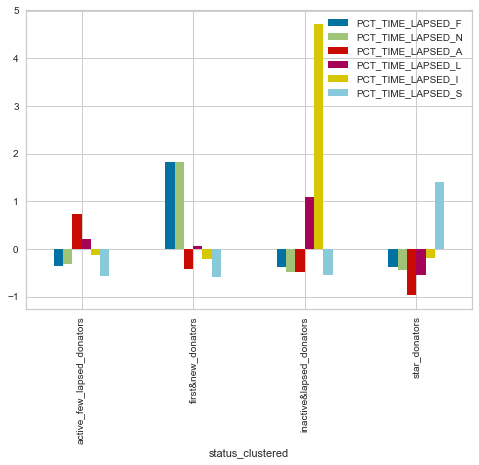

In [28]:
wip_df[columns + [new_column]].groupby(new_column).mean().plot.bar()

<AxesSubplot:xlabel='status_clustered'>

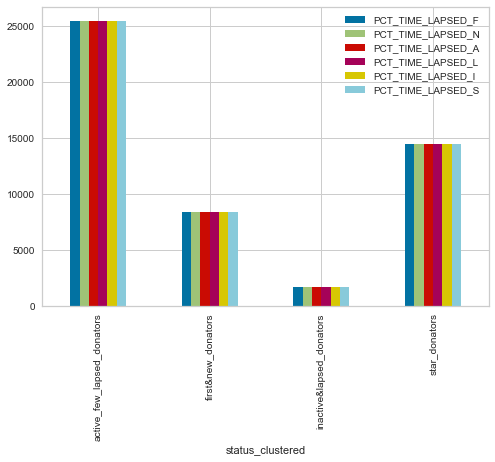

In [29]:
wip_df[columns + [new_column]].groupby(new_column).count().plot.bar()

# Wealthiness

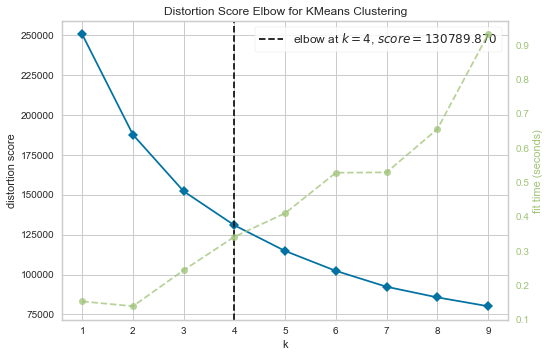

In [30]:
columns = wealth
elbow_model_plot(cluster.KMeans(), df[columns])

In [31]:
estimator = cluster.KMeans(
    init='k-means++',
    n_clusters =4,
    max_iter = 500,
    tol= 1e-4,
    random_state = 27,
    n_jobs = -1
)
estimator.fit_transform(df[columns])

new_column = 'wealth_clustered'
clustered_columns.append(new_column)
wip_df[new_column] = estimator.labels_
wip_df

C:\Users\josem\.conda\envs\python-standard\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,rurality,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR,transactions_clustered,status_clustered,wealth_clustered
1,-0.976386,-1.406364,0.761336,-1.042100,0.073456,-1.203812,0.469258,-1.462796,0.992516,0.760394,...,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,active_few_lapsed_donators,1
3,0.227235,0.835422,-0.963007,0.690595,0.343023,0.800863,0.469258,0.545795,-1.197044,-0.921244,...,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,2
4,1.437704,1.958111,-0.947152,1.977656,2.452111,1.951273,2.899786,0.683627,-0.645429,-0.285945,...,-0.119974,3.296185,6.651218,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,active_few_lapsed_donators,0
6,0.200737,0.656597,-0.724863,0.579250,-1.264142,0.707566,-1.459962,0.683627,-0.645429,-0.743016,...,0.647054,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,0
11,-1.879633,-1.949362,0.293782,-2.556039,-0.217700,-2.206149,0.469258,-0.747321,0.992516,-0.285945,...,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,first&new_donators,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0.575109,0.450159,0.136082,0.073483,-1.692578,0.294597,-1.459962,0.386679,-0.645429,0.303323,...,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,active_few_lapsed_donators,0
95404,-0.651028,0.205994,-1.260773,-0.630778,-0.217700,-0.342774,0.469258,0.683627,-0.645429,-0.921244,...,1.414082,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,0
95406,-0.197579,1.378420,-2.417319,0.422243,-0.217700,0.404485,-0.398236,1.102153,-1.197044,-1.332283,...,-0.119974,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,0
95410,2.401038,2.095585,0.234354,2.257214,3.234578,1.512033,2.398477,1.520678,0.049524,0.403261,...,-0.887001,3.296185,-0.150348,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,star_donators,1


In [32]:
wealth_clusters = {1:'urban_house_highincome', 2:'rural_nohouse_lowincome',
                   3:'urban_house_lowincome', 0:'rural_house_lowincome',
                   }
wip_df['wealth_clustered'].replace(wealth_clusters, inplace=True)

<AxesSubplot:xlabel='wealth_clustered'>

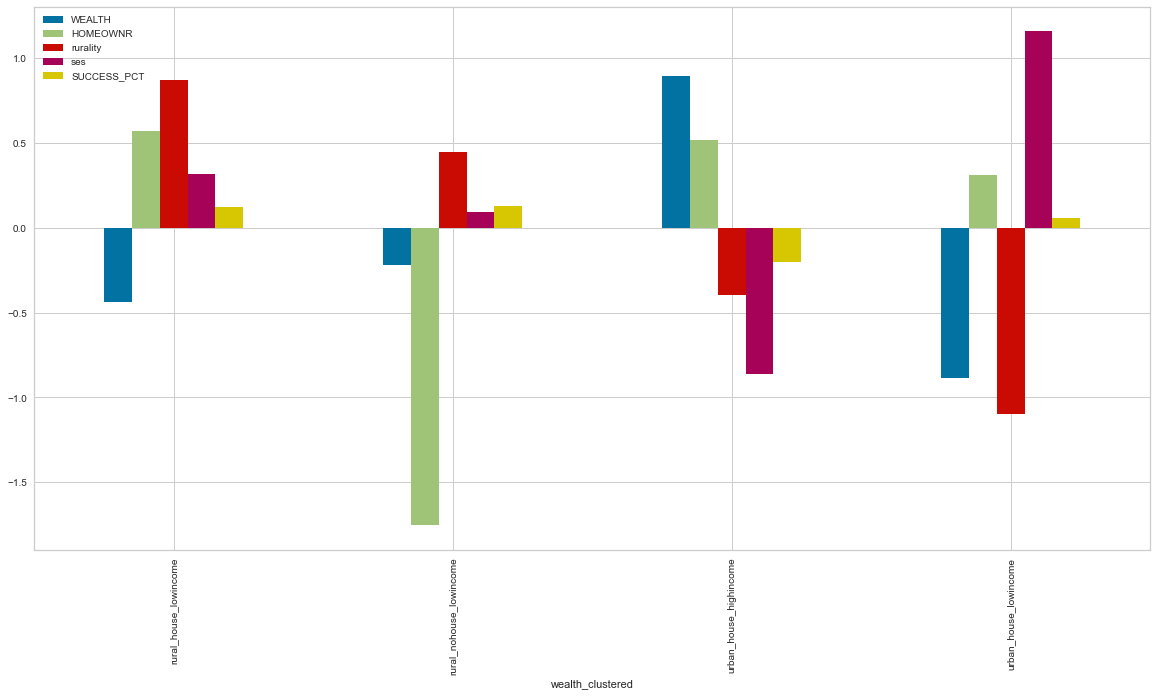

In [33]:
wip_df[columns + [new_column]].groupby(new_column).mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='wealth_clustered'>

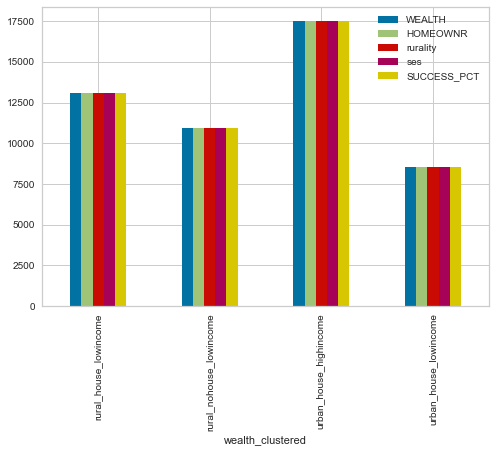

In [34]:
wip_df[columns + [new_column]].groupby(new_column).count().plot.bar()

# Personal Data

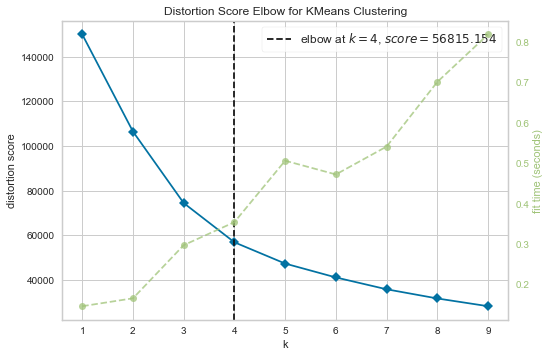

In [35]:
columns = personal
elbow_model_plot(cluster.KMeans(), df[columns])

In [36]:
estimator = cluster.KMeans(
    init='k-means++',
    n_clusters =4,
    max_iter = 500,
    tol= 1e-4,
    random_state = 27,
    n_jobs = -1
)
estimator.fit_transform(df[columns])

new_column = 'personal_clustered'
clustered_columns.append(new_column)
wip_df[new_column] = estimator.labels_
wip_df

C:\Users\josem\.conda\envs\python-standard\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR,transactions_clustered,status_clustered,wealth_clustered,personal_clustered
1,-0.976386,-1.406364,0.761336,-1.042100,0.073456,-1.203812,0.469258,-1.462796,0.992516,0.760394,...,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,active_few_lapsed_donators,urban_house_highincome,3
3,0.227235,0.835422,-0.963007,0.690595,0.343023,0.800863,0.469258,0.545795,-1.197044,-0.921244,...,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_nohouse_lowincome,1
4,1.437704,1.958111,-0.947152,1.977656,2.452111,1.951273,2.899786,0.683627,-0.645429,-0.285945,...,3.296185,6.651218,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,active_few_lapsed_donators,rural_house_lowincome,1
6,0.200737,0.656597,-0.724863,0.579250,-1.264142,0.707566,-1.459962,0.683627,-0.645429,-0.743016,...,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_house_lowincome,0
11,-1.879633,-1.949362,0.293782,-2.556039,-0.217700,-2.206149,0.469258,-0.747321,0.992516,-0.285945,...,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,first&new_donators,rural_nohouse_lowincome,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0.575109,0.450159,0.136082,0.073483,-1.692578,0.294597,-1.459962,0.386679,-0.645429,0.303323,...,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,active_few_lapsed_donators,rural_house_lowincome,1
95404,-0.651028,0.205994,-1.260773,-0.630778,-0.217700,-0.342774,0.469258,0.683627,-0.645429,-0.921244,...,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_house_lowincome,3
95406,-0.197579,1.378420,-2.417319,0.422243,-0.217700,0.404485,-0.398236,1.102153,-1.197044,-1.332283,...,-0.303381,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_house_lowincome,1
95410,2.401038,2.095585,0.234354,2.257214,3.234578,1.512033,2.398477,1.520678,0.049524,0.403261,...,3.296185,-0.150348,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,star_donators,urban_house_highincome,1


In [37]:
personnal_clusters = {
    0:'Parents', 
    1:'older people + Negative HIT',
    2:'older people + Positive HIT', 
    3:'rural_house_lowincome',
}
wip_df['wealth_clustered'].replace(wealth_clusters, inplace=True)

<AxesSubplot:xlabel='personal_clustered'>

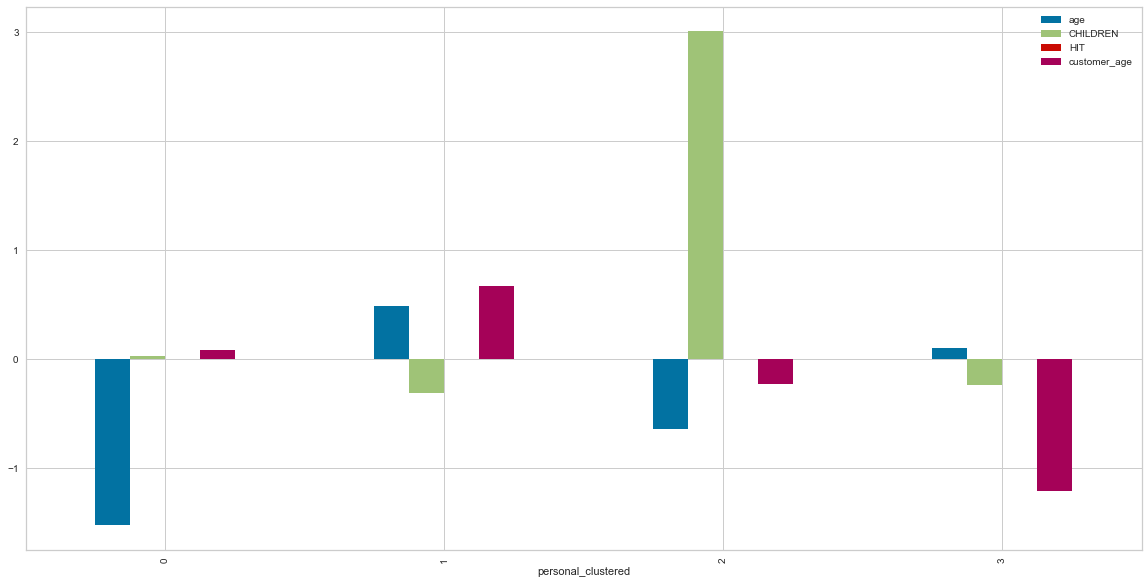

In [38]:
wip_df[columns + [new_column]].groupby(new_column).mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='personal_clustered'>

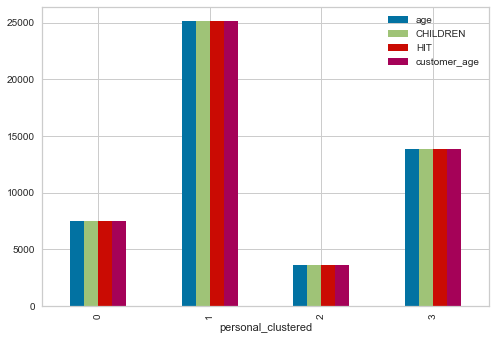

In [39]:
wip_df[columns + [new_column]].groupby(new_column).count().plot.bar()

# Clustering Clusters

In [40]:
# https://stats.stackexchange.com/questions/116856/hierarchical-or-twostep-cluster-analysis-for-binary-data

In [41]:
wip_df[clustered_columns]

,transactions_clustered,status_clustered,wealth_clustered,personal_clustered
1,sporadic_low_value_donators,active_few_lapsed_donators,urban_house_highincome,3
3,high_freq_low_amount_donators,star_donators,rural_nohouse_lowincome,1
4,avg_freq_high_amount_amount_donators,active_few_lapsed_donators,rural_house_lowincome,1
6,high_freq_low_amount_donators,star_donators,rural_house_lowincome,0
11,sporadic_low_value_donators,first&new_donators,rural_nohouse_lowincome,3
...,...,...,...,...
95403,high_freq_low_amount_donators,active_few_lapsed_donators,rural_house_lowincome,1
95404,high_freq_low_amount_donators,star_donators,rural_house_lowincome,3
95406,high_freq_low_amount_donators,star_donators,rural_house_lowincome,1
95410,avg_freq_high_amount_amount_donators,star_donators,urban_house_highincome,1


In [42]:
transactions = pd.get_dummies(wip_df[clustered_columns[0]])
status =  pd.get_dummies(wip_df[clustered_columns[1]])
wealth = pd.get_dummies(wip_df[clustered_columns[2]])

In [43]:
macro_cluster_df = pd.concat([transactions, status,wealth], axis =1) #current_spending

In [44]:
macro_cluster_df

,avg_freq_high_amount_amount_donators,high_freq_low_amount_donators,sporadic_low_value_donators,active_few_lapsed_donators,first&new_donators,inactive&lapsed_donators,star_donators,rural_house_lowincome,rural_nohouse_lowincome,urban_house_highincome,urban_house_lowincome
1,0,0,1,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,1,0,0
4,1,0,0,1,0,0,0,1,0,0,0
6,0,1,0,0,0,0,1,1,0,0,0
11,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95403,0,1,0,1,0,0,0,1,0,0,0
95404,0,1,0,0,0,0,1,1,0,0,0
95406,0,1,0,0,0,0,1,1,0,0,0
95410,1,0,0,0,0,0,1,0,0,1,0


In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(macro_cluster_df)
scaled_data = pd.DataFrame(scaled_data, columns= macro_cluster_df.columns)
scaled_data

,avg_freq_high_amount_amount_donators,high_freq_low_amount_donators,sporadic_low_value_donators,active_few_lapsed_donators,first&new_donators,inactive&lapsed_donators,star_donators,rural_house_lowincome,rural_nohouse_lowincome,urban_house_highincome,urban_house_lowincome
0,-0.678857,-0.751164,1.445039,0.982485,-0.449175,-0.18588,-0.638920,-0.594909,-0.528874,1.364382,-0.453474
1,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,-0.594909,1.890811,-0.732933,-0.453474
2,1.473064,-0.751164,-0.692023,0.982485,-0.449175,-0.18588,-0.638920,1.680929,-0.528874,-0.732933,-0.453474
3,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,1.680929,-0.528874,-0.732933,-0.453474
4,-0.678857,-0.751164,1.445039,-1.017827,2.226304,-0.18588,-0.638920,-0.594909,1.890811,-0.732933,-0.453474
...,...,...,...,...,...,...,...,...,...,...,...
50029,-0.678857,1.331268,-0.692023,0.982485,-0.449175,-0.18588,-0.638920,1.680929,-0.528874,-0.732933,-0.453474
50030,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,1.680929,-0.528874,-0.732933,-0.453474
50031,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,1.680929,-0.528874,-0.732933,-0.453474
50032,1.473064,-0.751164,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,-0.594909,-0.528874,1.364382,-0.453474


In [46]:
columns = macro_cluster_df.columns

estimator = cluster.AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage ='average' )


#elbow_model_plot(estimator, scaled_data)

In [47]:
estimator = cluster.AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage ='average' )

estimator.fit_predict(macro_cluster_df)

new_column = 'global_clusters'
wip_df[new_column] = estimator.labels_
macro_cluster_df[new_column] = estimator.labels_
scaled_data[new_column] = estimator.labels_
wip_df

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,...,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR,transactions_clustered,status_clustered,wealth_clustered,personal_clustered,global_clusters
1,-0.976386,-1.406364,0.761336,-1.042100,0.073456,-1.203812,0.469258,-1.462796,0.992516,0.760394,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,active_few_lapsed_donators,urban_house_highincome,3,4
3,0.227235,0.835422,-0.963007,0.690595,0.343023,0.800863,0.469258,0.545795,-1.197044,-0.921244,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_nohouse_lowincome,1,3
4,1.437704,1.958111,-0.947152,1.977656,2.452111,1.951273,2.899786,0.683627,-0.645429,-0.285945,...,6.651218,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,active_few_lapsed_donators,rural_house_lowincome,1,0
6,0.200737,0.656597,-0.724863,0.579250,-1.264142,0.707566,-1.459962,0.683627,-0.645429,-0.743016,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_house_lowincome,0,3
11,-1.879633,-1.949362,0.293782,-2.556039,-0.217700,-2.206149,0.469258,-0.747321,0.992516,-0.285945,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,sporadic_low_value_donators,first&new_donators,rural_nohouse_lowincome,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0.575109,0.450159,0.136082,0.073483,-1.692578,0.294597,-1.459962,0.386679,-0.645429,0.303323,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,active_few_lapsed_donators,rural_house_lowincome,1,0
95404,-0.651028,0.205994,-1.260773,-0.630778,-0.217700,-0.342774,0.469258,0.683627,-0.645429,-0.921244,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_house_lowincome,3,3
95406,-0.197579,1.378420,-2.417319,0.422243,-0.217700,0.404485,-0.398236,1.102153,-1.197044,-1.332283,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,high_freq_low_amount_donators,star_donators,rural_house_lowincome,1,3
95410,2.401038,2.095585,0.234354,2.257214,3.234578,1.512033,2.398477,1.520678,0.049524,0.403261,...,-0.150348,-0.033474,-0.126903,0.0,-0.059920,avg_freq_high_amount_amount_donators,star_donators,urban_house_highincome,1,3


<AxesSubplot:xlabel='global_clusters'>

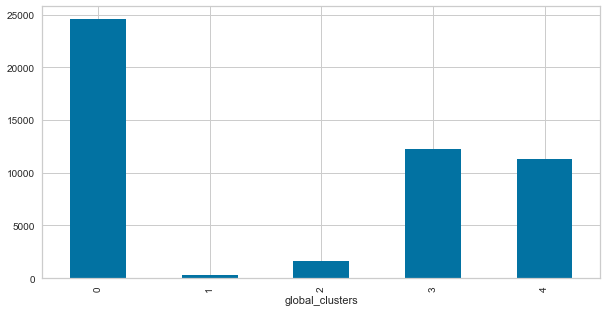

In [48]:
wip_df.groupby('global_clusters').count().iloc[:,1].plot.bar(figsize=(10,5))

In [49]:
scaled_data

,avg_freq_high_amount_amount_donators,high_freq_low_amount_donators,sporadic_low_value_donators,active_few_lapsed_donators,first&new_donators,inactive&lapsed_donators,star_donators,rural_house_lowincome,rural_nohouse_lowincome,urban_house_highincome,urban_house_lowincome,global_clusters
0,-0.678857,-0.751164,1.445039,0.982485,-0.449175,-0.18588,-0.638920,-0.594909,-0.528874,1.364382,-0.453474,4
1,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,-0.594909,1.890811,-0.732933,-0.453474,3
2,1.473064,-0.751164,-0.692023,0.982485,-0.449175,-0.18588,-0.638920,1.680929,-0.528874,-0.732933,-0.453474,0
3,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,1.680929,-0.528874,-0.732933,-0.453474,3
4,-0.678857,-0.751164,1.445039,-1.017827,2.226304,-0.18588,-0.638920,-0.594909,1.890811,-0.732933,-0.453474,4
...,...,...,...,...,...,...,...,...,...,...,...,...
50029,-0.678857,1.331268,-0.692023,0.982485,-0.449175,-0.18588,-0.638920,1.680929,-0.528874,-0.732933,-0.453474,0
50030,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,1.680929,-0.528874,-0.732933,-0.453474,3
50031,-0.678857,1.331268,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,1.680929,-0.528874,-0.732933,-0.453474,3
50032,1.473064,-0.751164,-0.692023,-1.017827,-0.449175,-0.18588,1.565142,-0.594909,-0.528874,1.364382,-0.453474,3


In [50]:
macro_cluster_df.groupby('global_clusters').mean()

,avg_freq_high_amount_amount_donators,high_freq_low_amount_donators,sporadic_low_value_donators,active_few_lapsed_donators,first&new_donators,inactive&lapsed_donators,star_donators,rural_house_lowincome,rural_nohouse_lowincome,urban_house_highincome,urban_house_lowincome
global_clusters,,,,,,,,,,,
0,0.499634,0.321353,0.179013,0.919367,0.000000,0.0,0.080633,0.312765,0.220775,0.267340,0.199121
1,0.712934,0.287066,0.000000,0.000000,1.000000,0.0,0.000000,0.246057,0.217666,0.362776,0.173502
2,0.474566,0.248354,0.277080,0.000000,0.000000,1.0,0.000000,0.226810,0.198085,0.403351,0.171753
3,0.203781,0.789508,0.006711,0.000000,0.000000,0.0,1.000000,0.242000,0.299124,0.315083,0.143792
4,0.000000,0.000000,1.000000,0.255085,0.717915,0.0,0.027001,0.175948,0.129408,0.557598,0.137046


In [136]:
graphs_df = macro_cluster_df.copy()


graphs_df['global_clusters'].replace({0: 'Active & Few Lapsed',
                                            1: 'First & New Frequent and/or High Amount',
                                            2: 'Inactive & Lapsed',
                                            3: 'Star Donors',
                                            4: 'Sporadic Low Value Donors'}, inplace=True)

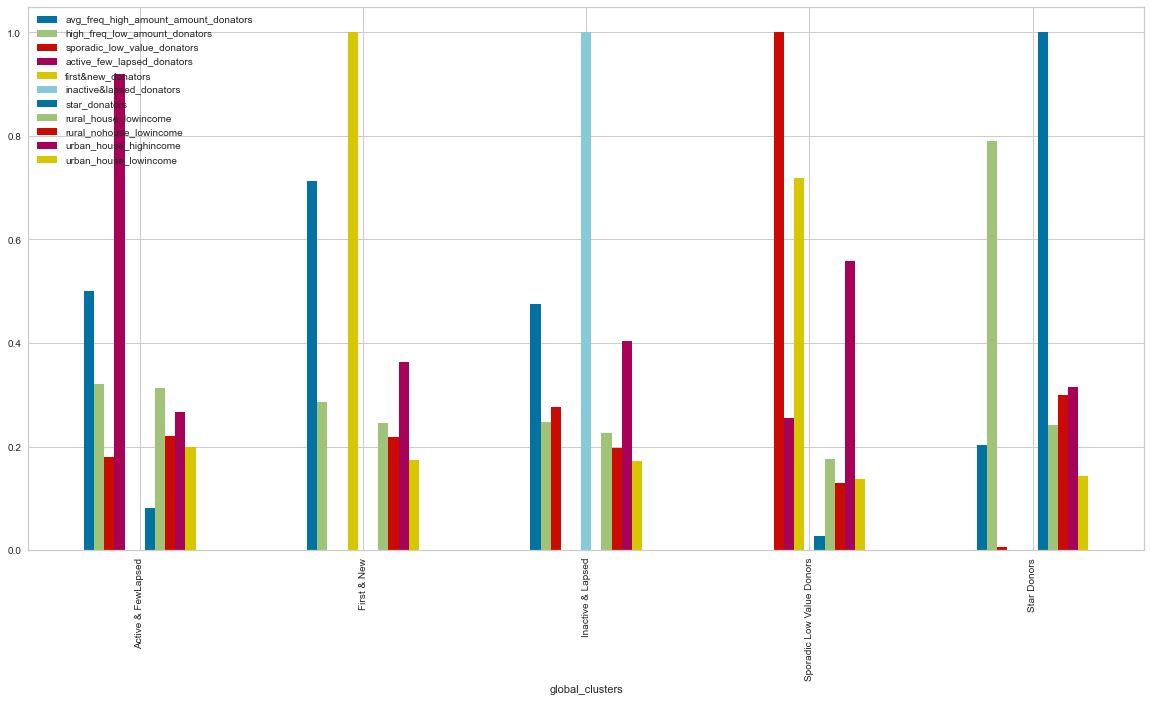

In [135]:
graphs_df.groupby('global_clusters').mean().plot.bar(figsize=(20,10))
plt.savefig('../Exports/Images/FinalGraphs/ag/final_result_all_nclusters5_final.png')

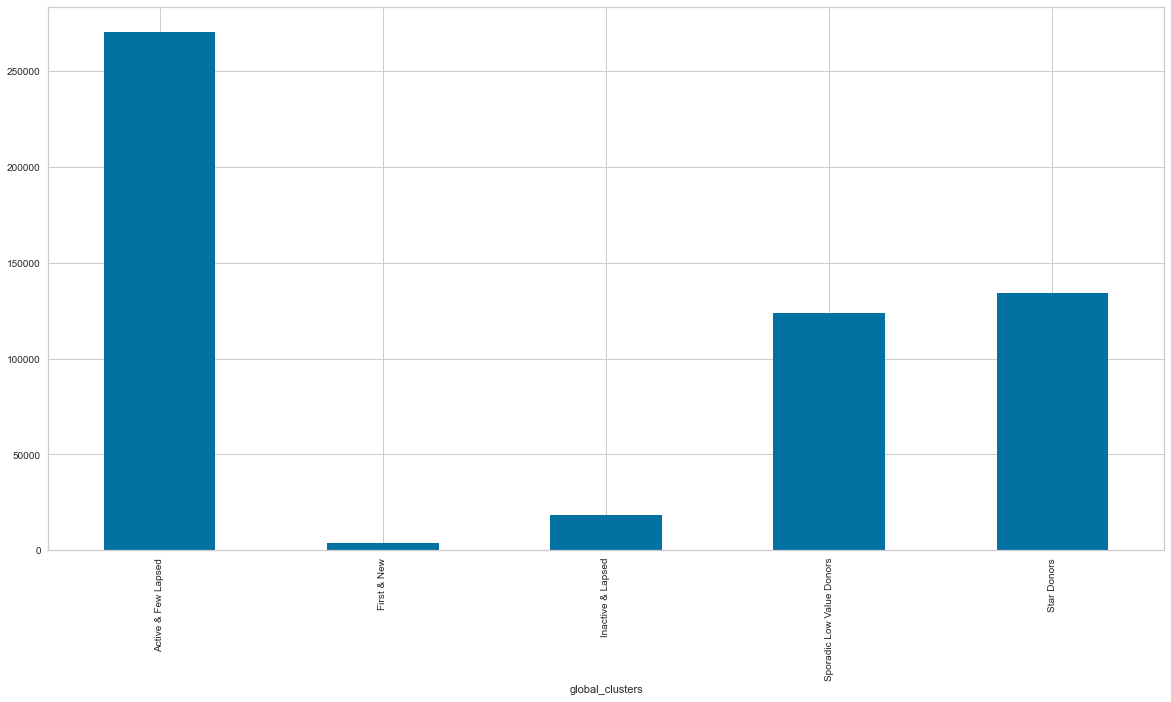

In [138]:
graphs_df.groupby('global_clusters').count().sum(axis=1).plot.bar(figsize=(20,10))
plt.savefig('../Exports/Images/FinalGraphs/ag/final_result_all_nclusters5_freq.png')

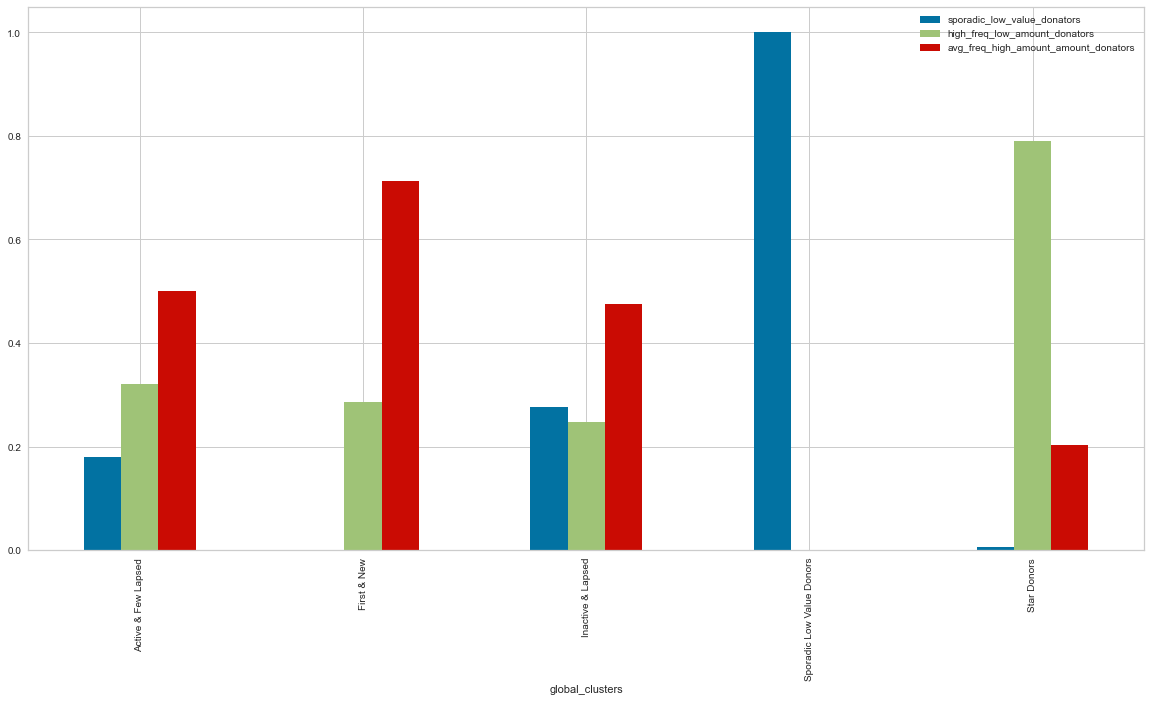

In [146]:
graphs_df.groupby('global_clusters').mean()[transaction_clusters.values()].plot.bar(figsize=(20,10))
plt.savefig('../Exports/Images/FinalGraphs/ag/transactions.png')

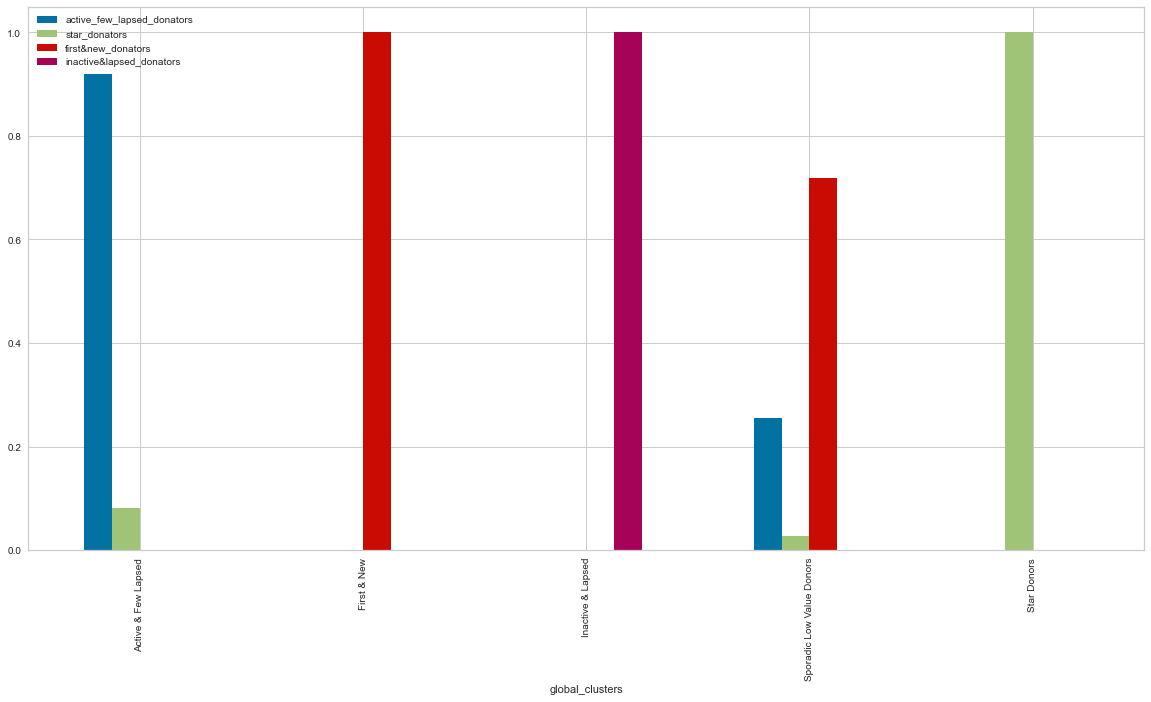

In [147]:
graphs_df.groupby('global_clusters').mean()[status_clusters.values()].plot.bar(figsize=(20,10))
plt.savefig('../Exports/Images/FinalGraphs/ag/status.png')

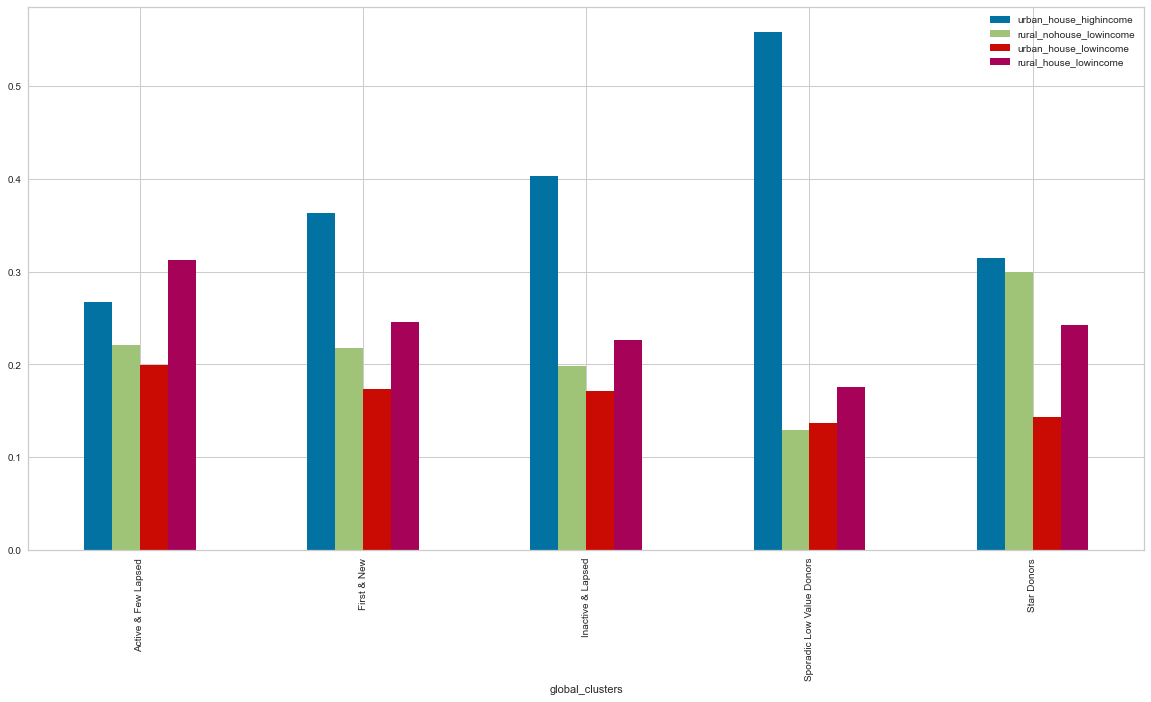

In [148]:
graphs_df.groupby('global_clusters').mean()[wealth_clusters.values()].plot.bar(figsize=(20,10))
plt.savefig('../Exports/Images/FinalGraphs/ag/wealth.png')

In [56]:
graphs_dfcluster_df

,avg_freq_high_amount_amount_donators,high_freq_low_amount_donators,sporadic_low_value_donators,active_few_lapsed_donators,first&new_donators,inactive&lapsed_donators,star_donators,rural_house_lowincome,rural_nohouse_lowincome,urban_house_highincome,urban_house_lowincome,global_clusters
1,0,0,1,1,0,0,0,0,0,1,0,4
3,0,1,0,0,0,0,1,0,1,0,0,3
4,1,0,0,1,0,0,0,1,0,0,0,0
6,0,1,0,0,0,0,1,1,0,0,0,3
11,0,0,1,0,1,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0,1,0,1,0,0,0,1,0,0,0,0
95404,0,1,0,0,0,0,1,1,0,0,0,3
95406,0,1,0,0,0,0,1,1,0,0,0,3
95410,1,0,0,0,0,0,1,0,0,1,0,3


# Crossing with Neighbourhood Data and Interests


In [57]:
data = pd.read_csv('../Data/donors.csv')

C:\Users\josem\.conda\envs\python-standard\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.



In [58]:
more_neigh_data = data.iloc[:,73:359]

In [59]:
interests = data.iloc[:,53:71].replace([' ', 'Y'], [0,1])

In [60]:
interests

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
neighbourhood_data = pd.read_csv('../Exports/CSV/neighborhood_PCAs.csv', index_col =0)
neighbourhood_data

,population_PC0,population_PC1,population_PC2,ethnicity_PC0,ethnicity_PC1,ethnicity_PC2,ethnicity_PC3,age_PC0,age_PC1,age_PC2,...,ancestry_PC2,ancestry_PC3,language_PC0,language_PC1,vehicles_PC0,vehicles_PC1,home_structures_PC0,home_structures_PC1,home_structures_PC2,home_structures_PC3
0,0.739090,0.067780,-0.042801,-0.098430,0.070711,0.084923,-0.041335,0.190415,-0.102805,0.084175,...,0.093601,-0.001376,0.008727,-0.020738,-0.149220,-0.010897,-0.124509,0.619359,0.573870,-0.017797
1,-0.502875,-0.041549,0.001666,0.113472,0.089578,-0.067811,0.364608,-0.093386,-0.200179,0.053230,...,0.170480,-0.005966,0.351867,0.288845,-0.423204,0.167903,0.350847,-0.898952,0.644572,-0.244706
2,0.860594,-0.388017,0.074251,-0.165348,-0.050983,-0.020042,-0.010343,0.039390,-0.023644,0.066496,...,-0.081666,-0.037821,-0.087985,-0.030935,-0.074077,0.054052,0.661761,0.957987,0.033777,-0.087882
3,0.839277,-0.307164,-0.047493,0.226661,0.408289,0.052619,0.098131,-0.064637,0.061481,-0.034796,...,0.175298,-0.057890,0.460731,-0.131707,0.106717,-0.012133,0.125746,0.947514,0.351210,-0.312514
4,-0.503624,-0.040291,-0.016821,1.460011,-0.387241,-0.086566,-0.144909,0.063102,-0.072991,0.043687,...,-0.097822,-0.022912,-0.129766,-0.021461,0.143617,-0.021804,-0.231893,0.606308,-0.684466,0.026371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,-0.502147,-0.040351,0.439798,0.055354,-0.019676,-0.139382,0.047945,-0.263776,0.007372,-0.069556,...,-0.041210,-0.017530,-0.050711,0.006336,-0.005037,-0.032424,0.171389,-0.645819,0.445428,-0.063976
95408,-0.455602,-0.059017,-0.036868,-0.111300,0.012264,-0.170490,0.001519,-0.197554,-0.253783,0.026877,...,-0.015463,-0.035667,-0.070260,-0.015635,-0.260051,0.028339,0.731106,-0.513666,0.717545,-0.630757
95409,-0.502441,-0.042657,-0.048110,0.087468,0.000609,-0.067653,-0.062194,-0.221290,0.014694,-0.111480,...,0.037749,-0.036389,-0.040646,-0.018018,0.179976,-0.083844,-1.301114,0.167467,0.020088,-0.147724
95410,-0.503470,-0.040652,-0.029984,-0.120617,0.032490,-0.024631,0.024630,0.000446,-0.042582,0.020395,...,0.042502,0.030240,0.054733,0.018708,-0.325036,0.103284,-0.280825,-0.489488,0.432552,0.358810


In [78]:
macro_cluster_df['global_clusters']

1        4
3        3
4        0
6        3
11       4
        ..
95403    0
95404    3
95406    3
95410    3
95411    3
Name: global_clusters, Length: 50034, dtype: int64

In [79]:
all_data = pd.merge(left=macro_cluster_df['global_clusters'],
                   right = neighbourhood_data, left_index=True, right_index=True )
all_data

,global_clusters,population_PC0,population_PC1,population_PC2,ethnicity_PC0,ethnicity_PC1,ethnicity_PC2,ethnicity_PC3,age_PC0,age_PC1,...,ancestry_PC2,ancestry_PC3,language_PC0,language_PC1,vehicles_PC0,vehicles_PC1,home_structures_PC0,home_structures_PC1,home_structures_PC2,home_structures_PC3
1,4,-0.502875,-0.041549,0.001666,0.113472,0.089578,-0.067811,0.364608,-0.093386,-0.200179,...,0.170480,-0.005966,0.351867,0.288845,-0.423204,0.167903,0.350847,-0.898952,0.644572,-0.244706
3,3,0.839277,-0.307164,-0.047493,0.226661,0.408289,0.052619,0.098131,-0.064637,0.061481,...,0.175298,-0.057890,0.460731,-0.131707,0.106717,-0.012133,0.125746,0.947514,0.351210,-0.312514
4,0,-0.503624,-0.040291,-0.016821,1.460011,-0.387241,-0.086566,-0.144909,0.063102,-0.072991,...,-0.097822,-0.022912,-0.129766,-0.021461,0.143617,-0.021804,-0.231893,0.606308,-0.684466,0.026371
6,3,0.498543,0.957287,-0.044350,-0.184912,-0.063548,0.083852,-0.020596,0.121967,-0.020355,...,0.037330,-0.022577,-0.128365,-0.015089,0.019120,-0.083780,-0.422091,-0.130482,-0.243655,-0.049162
11,4,-0.504227,-0.039397,-0.050376,-0.213336,-0.090004,0.083074,-0.008031,0.077498,0.156504,...,0.071440,0.028363,-0.080390,0.005982,0.315881,-0.095996,-0.821535,0.236774,-0.726092,-0.188956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0,0.864255,-0.402423,-0.029174,-0.212721,-0.064093,-0.071653,-0.008332,-0.088736,-0.097634,...,0.258439,-0.034202,-0.106488,-0.013932,-0.169404,0.018931,0.055144,0.598212,0.183285,-0.198118
95404,3,0.805718,-0.180854,0.126031,-0.189253,-0.076532,-0.070167,-0.014276,-0.069455,-0.092697,...,-0.088923,-0.004851,-0.129766,-0.021461,0.172910,0.020045,0.548723,0.491361,-0.030534,-0.090160
95406,3,0.861947,-0.410025,-0.026005,-0.042434,-0.060011,-0.019090,-0.006453,0.081644,-0.039193,...,-0.047067,-0.038982,-0.083699,-0.009440,-0.169027,0.045002,1.302365,0.953292,0.080173,-0.037235
95410,3,-0.503470,-0.040652,-0.029984,-0.120617,0.032490,-0.024631,0.024630,0.000446,-0.042582,...,0.042502,0.030240,0.054733,0.018708,-0.325036,0.103284,-0.280825,-0.489488,0.432552,0.358810


In [80]:

extended_data = pd.merge(left=more_neigh_data, right=all_data, left_index=True, right_index=True)
extended_data = pd.merge(left=interests, right=extended_data, left_index=True, right_index=True)
extended_data['global_clusters']

1        4
3        3
4        0
6        3
11       4
        ..
95403    0
95404    3
95406    3
95410    3
95411    3
Name: global_clusters, Length: 50019, dtype: int64

In [81]:
from scipy.stats import ttest_ind

# Group 0 - Active & Few Lapsed

### Differences regarding their neighbourhoods 

In [82]:

p_values_0 = pd.DataFrame(ttest_ind(all_data[all_data['global_clusters']==0], all_data, equal_var=False)[1],
                          index = all_data.columns, 
                         columns = ['p_values_group0']).sort_values(by ='p_values_group0').drop(index=['global_clusters'])


<AxesSubplot:>

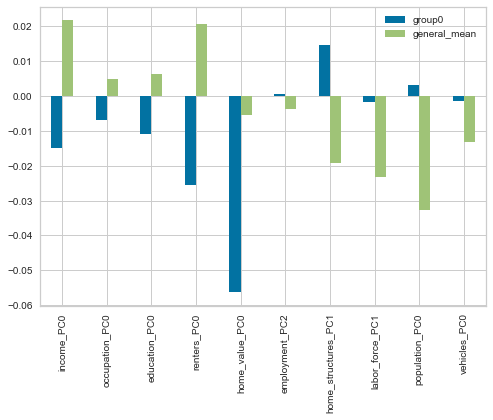

In [83]:
top_distinguishable_features_group0 = p_values_0.index[:10]

comparisson_table = pd.DataFrame(all_data[all_data['global_clusters']==0][top_distinguishable_features_group0].mean(), columns = ['group0'])
comparisson_table['general_mean'] = all_data[top_distinguishable_features_group0].mean()
comparisson_table.plot.bar()

In [84]:
pca_representatives_dic = {'income_PC0' : ['IC1','IC2', 'IC3', 'IC4', 'IC5'], 
'occupation_PC0' : ['OCC1', 'OCC2', 'OCC10', 'OCC13'], 
'education_PC0' : ['EC1','EC2','EC3', 'EC4', 'EC7', 'EC8'],
'renters_PC0' : ['RP1', 'RP2', 'RP3', 'RP4'],
'home_value_PC0' : ['HV1', 'HV2','HV3'],
'employment_PC2' : ['EIC1', 'EIC9'],
'labor_force_PC0' : ['LFC9'],
'income_PC1' : ['ADI'],
'housing_units_PC1': ['HU1', 'HU2'], 
'ancestry_PC0' : ['POBC1', 'POBC2'], 
'home_structures_PC1': ['HC17', 'HC18', 'HC19'], 
'labor_force_PC1': ['LFC9'], 
'population_PC0': ['POP90C1', 'POP90C3'], 
'ethnicity_PC0' : ['ETH1', 'ETH2', 
                   'ETHC1', 'ETHC2', 'ETHC3', 
                  'ETHC4', 'ETHC5', 'ETHC6'], 
'marriage_PC1' : ['MARR1', 'MARR2','MARR3','MARR4'],
'income_PC3' : ['HHAS1', 'IC18'], 
'ancestry_PC1' : ['ANC4', 'POBC1'],
'transportation_PC0': ['TPE10', 'TPE11', 'TPE13'], 
'families_PC1': ['HHD7', 'HHD8', 'HHD9'], 
                          }



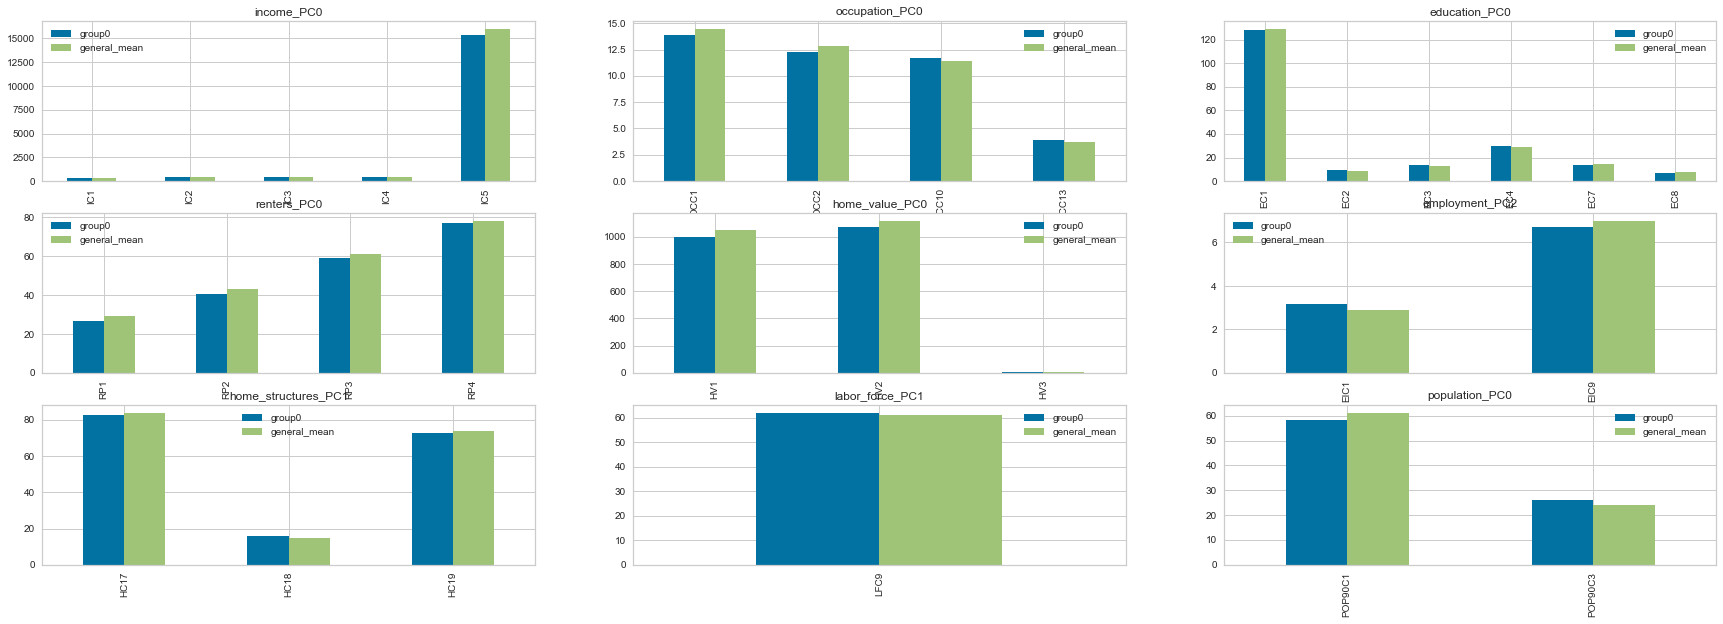

In [85]:
fig, axes = plt.subplots(3,3,figsize=(30,10))

cluster_number = 0
pca_micro = top_distinguishable_features_group0

#top1
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[0]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[0]]].mean()
micro_comparisson.plot.bar(ax=axes[0,0], title=pca_micro[0])

#top2
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[1]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[1]]].mean()
micro_comparisson.plot.bar(ax=axes[0,1], title=pca_micro[1])

#top3
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[2]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[2]]].mean()
micro_comparisson.plot.bar(ax=axes[0,2], title=pca_micro[2])

#top4
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[3]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[3]]].mean()
micro_comparisson.plot.bar(ax=axes[1,0], title=pca_micro[3])

#top5
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[4]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[4]]].mean()
micro_comparisson.plot.bar(ax=axes[1,1], title=pca_micro[4])

#top6
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[5]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[5]]].mean()
micro_comparisson.plot.bar(ax=axes[1,2], title=pca_micro[5])

#top7
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[6]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[6]]].mean()
micro_comparisson.plot.bar(ax=axes[2,0], title=pca_micro[6])

#top8
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[7]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[7]]].mean()
micro_comparisson.plot.bar(ax=axes[2,1], title=pca_micro[7])

#top9
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[8]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[8]]].mean()
micro_comparisson.plot.bar(ax=axes[2,2], title=pca_micro[8])


plt.show()

## Differences Regarding Interests

In [86]:
extended_data.iloc[:,:18]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
6,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95404,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0
95406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
p_values_0_interests = pd.DataFrame(ttest_ind(extended_data[extended_data['global_clusters']==0].iloc[:,:18], extended_data.iloc[:,:18], equal_var=False)[1],
                          index = extended_data.iloc[:,:18].columns, 
                          columns = ['p_values_group0']).sort_values(by ='p_values_group0')
p_values_0_interests
#p_values_0.sort_values(by =0).drop(index=['global_clusters']).head(38).plot.bar()

,p_values_group0
PCOWNERS,0.001539
CDPLAY,0.003024
STEREO,0.005643
CRAFTS,0.084721
CARDS,0.226339
WALKER,0.332749
BOATS,0.386155
COLLECT1,0.392404
CATLG,0.508221
BIBLE,0.526625


<AxesSubplot:>

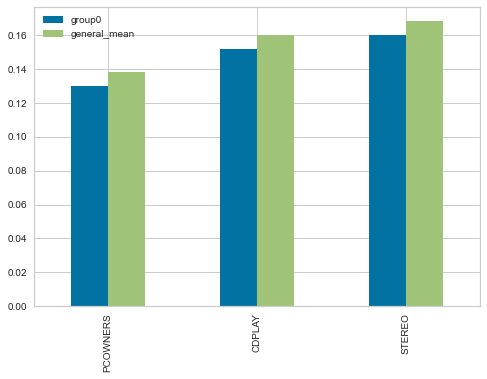

In [88]:
top_distinguishable_interests_group0 = p_values_0_interests.index[:3]

comparisson_table = pd.DataFrame(extended_data[extended_data['global_clusters']==0][top_distinguishable_interests_group0].mean(), columns = ['group0'])
comparisson_table['general_mean'] = extended_data[top_distinguishable_interests_group0].mean()
comparisson_table.plot.bar()

# Group 1 - First & New Donators

In [89]:

p_values_1 = pd.DataFrame(ttest_ind(all_data[all_data['global_clusters']==1], all_data, equal_var=False)[1],
                          index = all_data.columns, 
                         columns = ['p_values_group0']).sort_values(by ='p_values_group0').drop(index=['global_clusters'])
#p_values_0.sort_values(by =0).drop(index=['global_clusters']).head(38).plot.bar()

<AxesSubplot:>

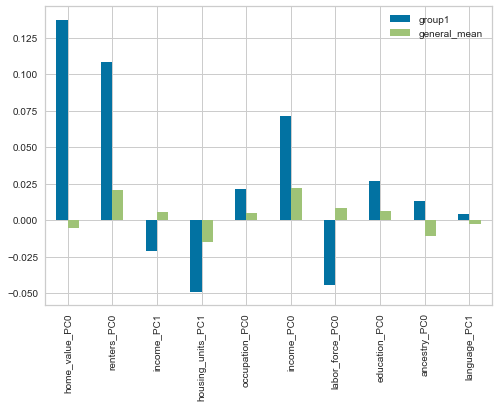

In [91]:
top_distinguishable_features_group1 = p_values_1.index[:10]

comparisson_table = pd.DataFrame(all_data[all_data['global_clusters']==1][top_distinguishable_features_group1].mean(), columns = ['group1'])
comparisson_table['general_mean'] = all_data[top_distinguishable_features_group1].mean()
comparisson_table.plot.bar()

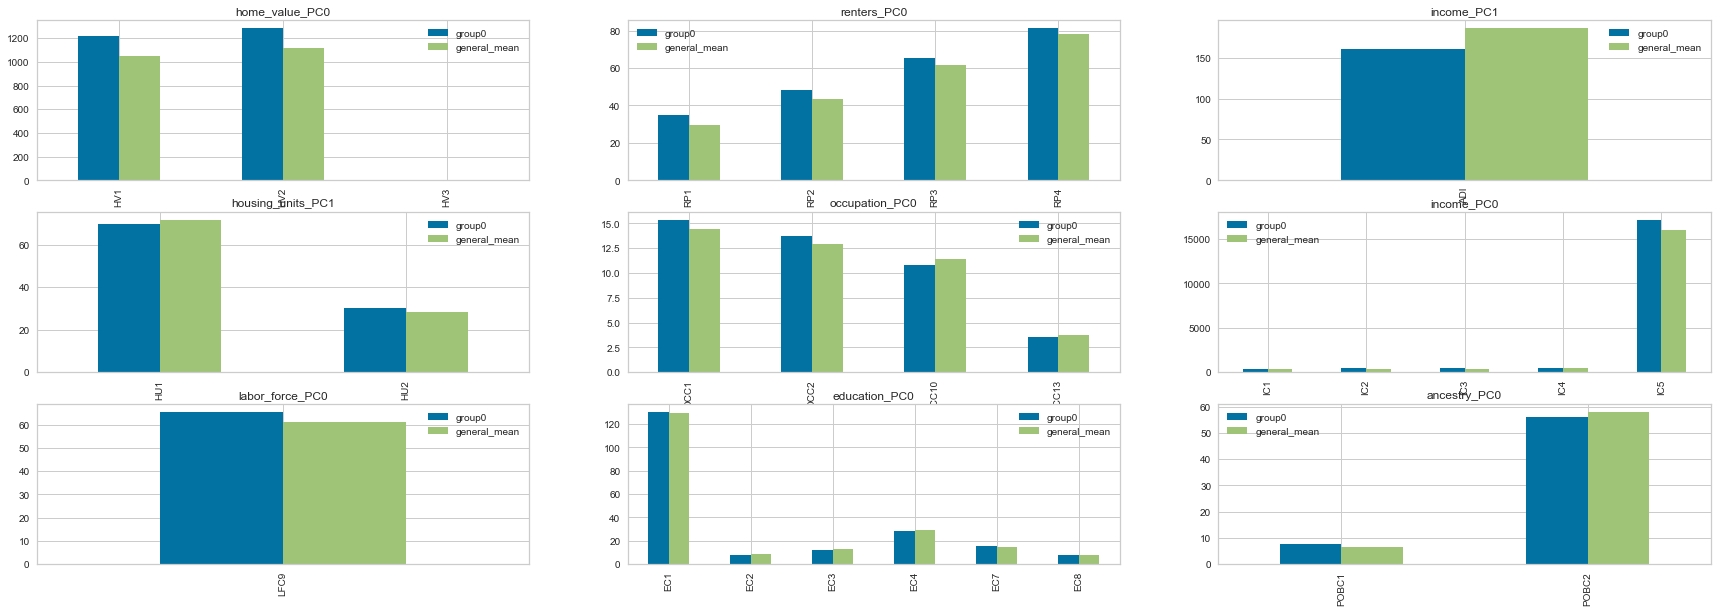

In [92]:
fig, axes = plt.subplots(3,3,figsize=(30,10))

cluster_number = 1
pca_micro = top_distinguishable_features_group1

#top1
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[0]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[0]]].mean()
micro_comparisson.plot.bar(ax=axes[0,0], title=pca_micro[0])

#top2
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[1]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[1]]].mean()
micro_comparisson.plot.bar(ax=axes[0,1], title=pca_micro[1])

#top3
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[2]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[2]]].mean()
micro_comparisson.plot.bar(ax=axes[0,2], title=pca_micro[2])

#top4
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[3]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[3]]].mean()
micro_comparisson.plot.bar(ax=axes[1,0], title=pca_micro[3])

#top5
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[4]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[4]]].mean()
micro_comparisson.plot.bar(ax=axes[1,1], title=pca_micro[4])

#top6
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[5]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[5]]].mean()
micro_comparisson.plot.bar(ax=axes[1,2], title=pca_micro[5])

#top7
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[6]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[6]]].mean()
micro_comparisson.plot.bar(ax=axes[2,0], title=pca_micro[6])

#top8
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[7]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[7]]].mean()
micro_comparisson.plot.bar(ax=axes[2,1], title=pca_micro[7])

#top9
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[8]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[8]]].mean()
micro_comparisson.plot.bar(ax=axes[2,2], title=pca_micro[8])


plt.show()

## Differences in Interests

In [93]:
cluster_number = 1

p_values_1_interests = pd.DataFrame(ttest_ind(extended_data[extended_data['global_clusters']==cluster_number].iloc[:,:18], extended_data.iloc[:,:18], equal_var=False)[1],
                          index = extended_data.iloc[:,:18].columns, 
                          columns = ['p_values_group0']).sort_values(by ='p_values_group0')
p_values_1_interests
#p_values_0.sort_values(by =0).drop(index=['global_clusters']).head(38).plot.bar()

,p_values_group0
PCOWNERS,0.021581
COLLECT1,0.022611
WALKER,0.050450
CARDS,0.072048
BOATS,0.119572
PLATES,0.231458
KIDSTUFF,0.322463
CATLG,0.351495
FISHER,0.358807
BIBLE,0.490072


<AxesSubplot:>

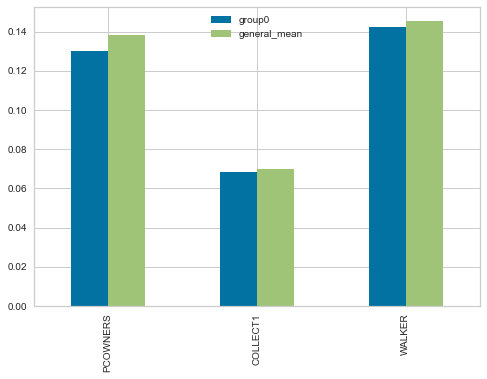

In [94]:
top_distinguishable_interests_group1 = p_values_1_interests.index[:3]

comparisson_table = pd.DataFrame(extended_data[extended_data['global_clusters']==0][top_distinguishable_interests_group1].mean(), columns = ['group0'])
comparisson_table['general_mean'] = extended_data[top_distinguishable_interests_group1].mean()
comparisson_table.plot.bar()

# Group 2 - Inactive & Lapsed

In [95]:
p_values_2 = pd.DataFrame(ttest_ind(all_data[all_data['global_clusters']==1], all_data, equal_var=False)[1],
                          index = all_data.columns, 
                         columns = ['p_values_group1']).sort_values(by ='p_values_group1').drop(index=['global_clusters'])


In [96]:
p_values_2 

,p_values_group1
home_value_PC0,0.001297
renters_PC0,0.006890
income_PC1,0.012599
housing_units_PC1,0.013791
occupation_PC0,0.016218
...,...
occupation_PC1,0.917765
age_PC3,0.957199
occupation_PC5,0.966552
occupation_PC2,0.990051


<AxesSubplot:>

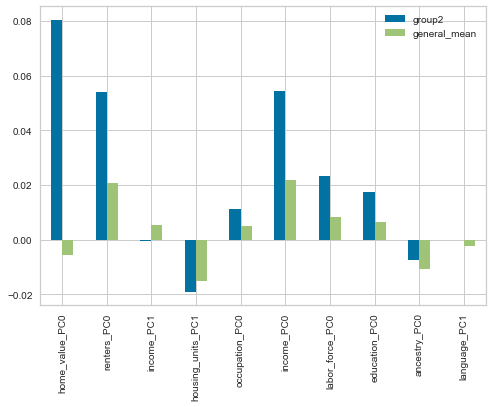

In [97]:
top_distinguishable_features_group2 = p_values_2.index[:10]

comparisson_table = pd.DataFrame(all_data[all_data['global_clusters']==2][top_distinguishable_features_group1].mean(), columns = ['group2'])
comparisson_table['general_mean'] = all_data[top_distinguishable_features_group2].mean()
comparisson_table.plot.bar()

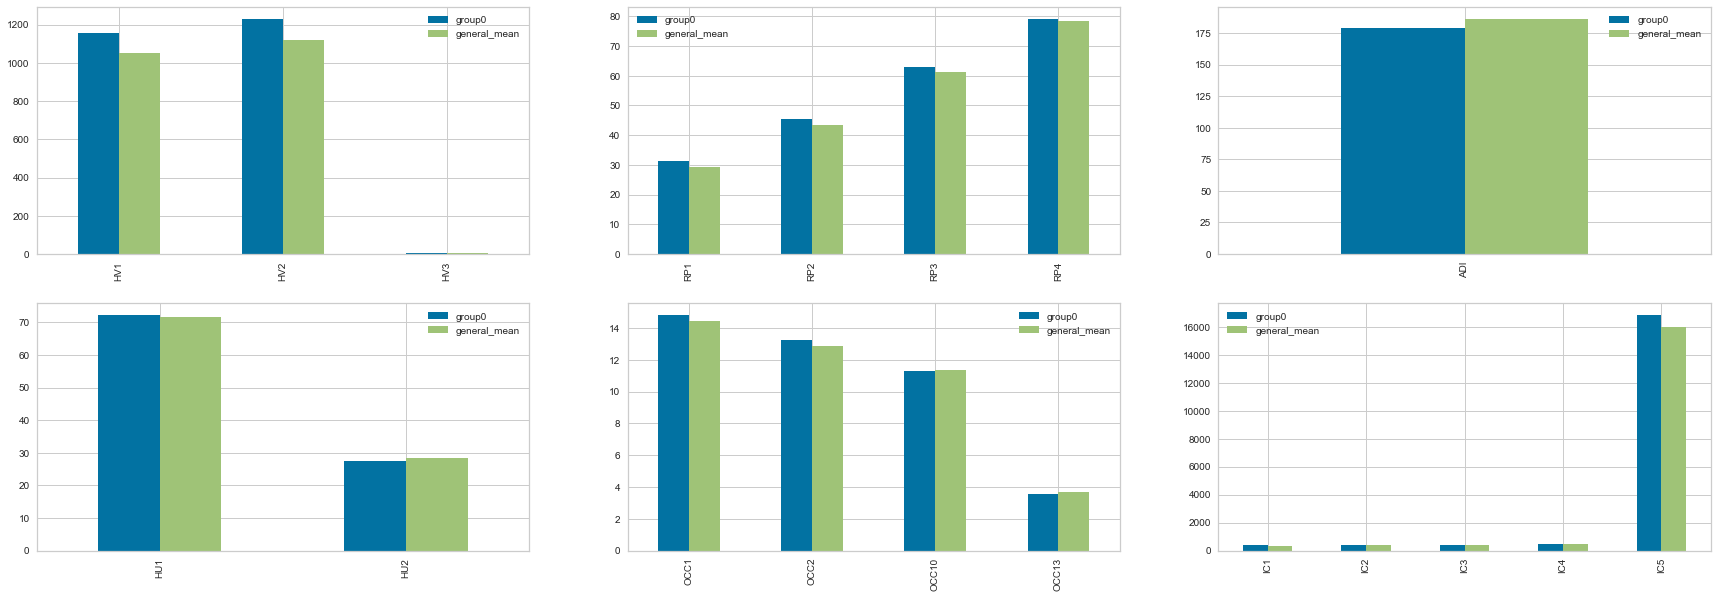

In [98]:
fig, axes = plt.subplots(2,3,figsize=(30,10))

cluster_number = 2
pca_micro = top_distinguishable_features_group2

#top1
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[0]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[0]]].mean()
micro_comparisson.plot.bar(ax=axes[0,0])

#top2
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[1]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[1]]].mean()
micro_comparisson.plot.bar(ax=axes[0,1])

#top3
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[2]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[2]]].mean()
micro_comparisson.plot.bar(ax=axes[0,2])

#top4
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[3]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[3]]].mean()
micro_comparisson.plot.bar(ax=axes[1,0])

#top5
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[4]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[4]]].mean()
micro_comparisson.plot.bar(ax=axes[1,1])

#top6
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[5]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[5]]].mean()
micro_comparisson.plot.bar(ax=axes[1,2])

plt.show()

## Differences in Interests

In [99]:
cluster_number = 2

p_values_2_interests = pd.DataFrame(ttest_ind(extended_data[extended_data['global_clusters']==cluster_number].iloc[:,:18], extended_data.iloc[:,:18], equal_var=False)[1],
                          index = extended_data.iloc[:,:18].columns, 
                          columns = ['p_values_group0']).sort_values(by ='p_values_group0')
p_values_2_interests


,p_values_group0
BIBLE,0.000029
FISHER,0.000543
WALKER,0.000959
CRAFTS,0.005343
PETS,0.006016
COLLECT1,0.017507
GARDENIN,0.018951
VETERANS,0.040135
CARDS,0.042722
CATLG,0.072779


<AxesSubplot:>

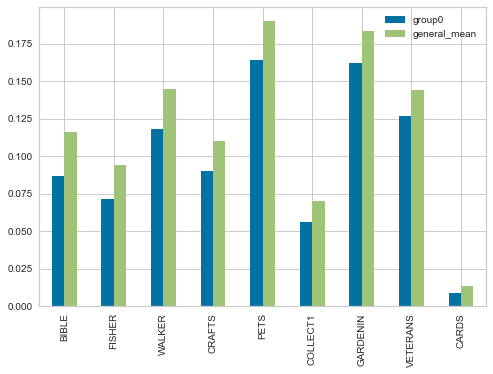

In [100]:
top_distinguishable_interests_group2 = p_values_2_interests[p_values_2_interests['p_values_group0'] <= 0.05].index
comparisson_table = pd.DataFrame(extended_data[extended_data['global_clusters']==2][top_distinguishable_interests_group2].mean(), columns = ['group0'])
comparisson_table['general_mean'] = extended_data[top_distinguishable_interests_group2].mean()
comparisson_table.plot.bar()

# Group 3 - Star Donators

In [101]:
p_values_3 = pd.DataFrame(ttest_ind(all_data[all_data['global_clusters']==3], all_data, equal_var=False)[1],
                          index = all_data.columns, 
                         columns = ['p_values_group3']).sort_values(by ='p_values_group3').drop(index=['global_clusters'])


<AxesSubplot:>

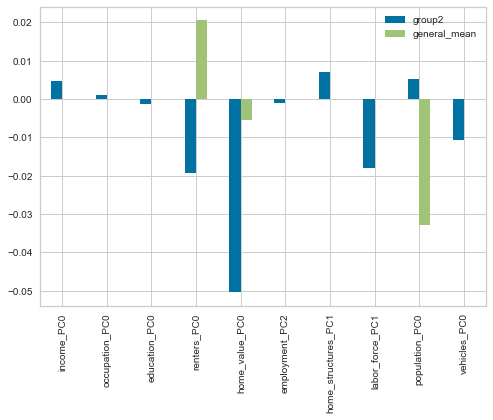

In [102]:
top_distinguishable_features_group3 = p_values_3.index[:10]

comparisson_table = pd.DataFrame(all_data[all_data['global_clusters']==3][top_distinguishable_features_group0].mean(), columns = ['group2'])
comparisson_table['general_mean'] = all_data[top_distinguishable_features_group3].mean()
comparisson_table.plot.bar()

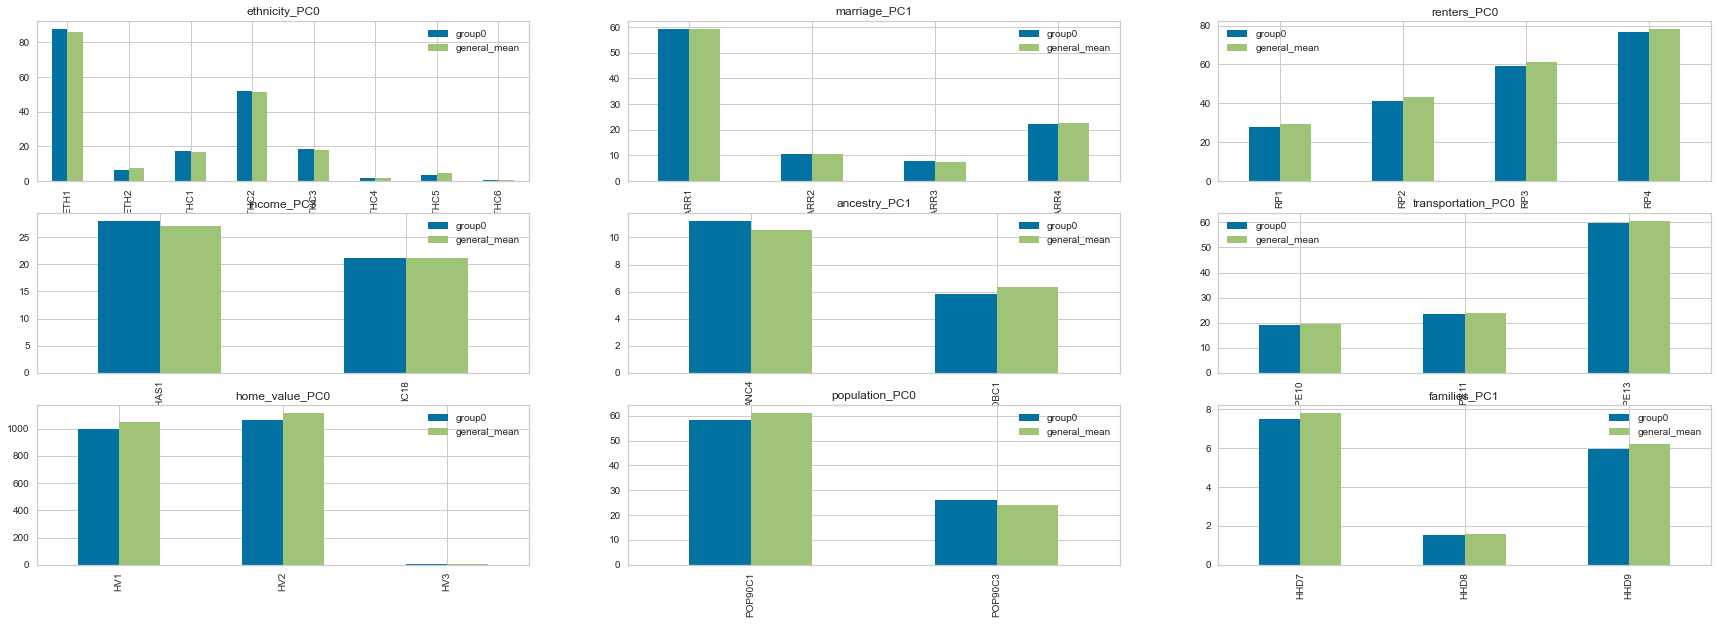

In [103]:
fig, axes = plt.subplots(3,3,figsize=(30,10))

cluster_number = 3
pca_micro = top_distinguishable_features_group3

#top1
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[0]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[0]]].mean()
micro_comparisson.plot.bar(ax=axes[0,0], title=pca_micro[0])

#top2
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[1]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[1]]].mean()
micro_comparisson.plot.bar(ax=axes[0,1], title=pca_micro[1])

#top3
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[2]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[2]]].mean()
micro_comparisson.plot.bar(ax=axes[0,2], title=pca_micro[2])

#top4
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[3]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[3]]].mean()
micro_comparisson.plot.bar(ax=axes[1,0], title=pca_micro[3])

#top5
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[4]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[4]]].mean()
micro_comparisson.plot.bar(ax=axes[1,1], title=pca_micro[4])

#top6
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[5]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[5]]].mean()
micro_comparisson.plot.bar(ax=axes[1,2], title=pca_micro[5])

#top7
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[6]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[6]]].mean()
micro_comparisson.plot.bar(ax=axes[2,0], title=pca_micro[6])

#top8
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[7]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[7]]].mean()
micro_comparisson.plot.bar(ax=axes[2,1], title=pca_micro[7])

#top9
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[8]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[8]]].mean()
micro_comparisson.plot.bar(ax=axes[2,2], title=pca_micro[8])


plt.show()

## Differences in Interests

In [104]:
cluster_number = 3

p_values_3_interests = pd.DataFrame(ttest_ind(extended_data[extended_data['global_clusters']==cluster_number].iloc[:,:18], extended_data.iloc[:,:18], equal_var=False)[1],
                          index = extended_data.iloc[:,:18].columns, 
                          columns = ['p_values_group0']).sort_values(by ='p_values_group0')

p_values_3_interests


,p_values_group0
PCOWNERS,6.033649e-17
CDPLAY,4.864329e-10
PETS,1.173024e-06
BOATS,7.733395e-06
PHOTO,1.248106e-04
HOMEE,4.295508e-04
STEREO,6.427987e-04
FISHER,1.075755e-02
CATLG,1.214667e-02
COLLECT1,1.761492e-02


<AxesSubplot:>

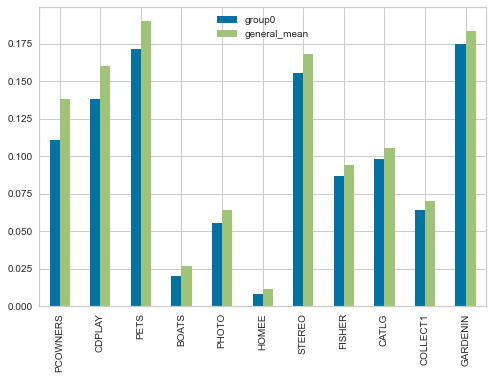

In [105]:
top_distinguishable_interests_group3 = p_values_3_interests[p_values_3_interests['p_values_group0'] <= 0.05].index

comparisson_table = pd.DataFrame(extended_data[extended_data['global_clusters']==3][top_distinguishable_interests_group3].mean(), columns = ['group0'])
comparisson_table['general_mean'] = extended_data[top_distinguishable_interests_group3].mean()
comparisson_table.plot.bar()

# Sporadic & Recent Donors

In [106]:
p_values_4 = pd.DataFrame(ttest_ind(all_data[all_data['global_clusters']==4], all_data, equal_var=False)[1],
                          index = all_data.columns, 
                         columns = ['p_values_group4']).sort_values(by ='p_values_group4').drop(index=['global_clusters'])


<AxesSubplot:>

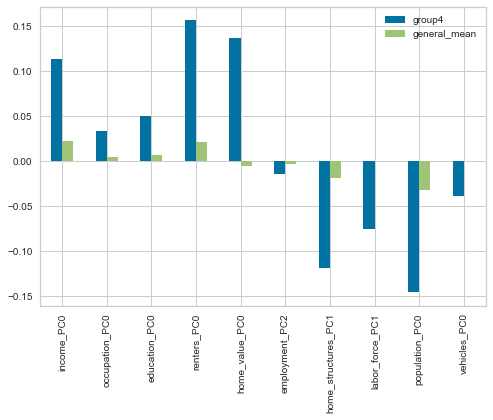

In [107]:
top_distinguishable_features_group4 = p_values_4.index[:10]

comparisson_table = pd.DataFrame(all_data[all_data['global_clusters']==4][top_distinguishable_features_group0].mean(), columns = ['group4'])
comparisson_table['general_mean'] = all_data[top_distinguishable_features_group4].mean()
comparisson_table.plot.bar()

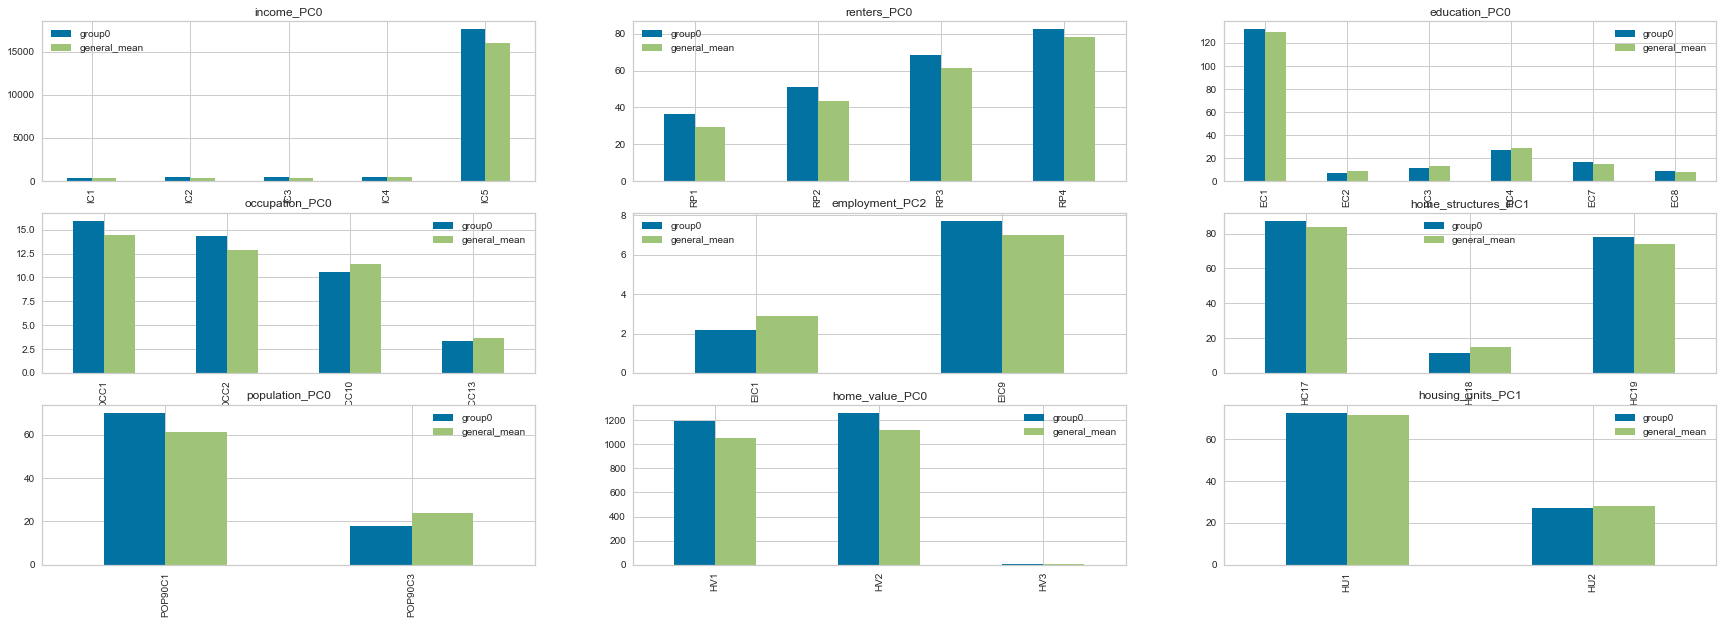

In [108]:
fig, axes = plt.subplots(3,3,figsize=(30,10))

cluster_number = 4
pca_micro = top_distinguishable_features_group4

#top1
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[0]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[0]]].mean()
micro_comparisson.plot.bar(ax=axes[0,0], title=pca_micro[0])

#top2
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[1]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[1]]].mean()
micro_comparisson.plot.bar(ax=axes[0,1], title=pca_micro[1])

#top3
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[2]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[2]]].mean()
micro_comparisson.plot.bar(ax=axes[0,2], title=pca_micro[2])

#top4
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[3]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[3]]].mean()
micro_comparisson.plot.bar(ax=axes[1,0], title=pca_micro[3])

#top5
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[4]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[4]]].mean()
micro_comparisson.plot.bar(ax=axes[1,1], title=pca_micro[4])

#top6
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[5]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[5]]].mean()
micro_comparisson.plot.bar(ax=axes[1,2], title=pca_micro[5])

#top7
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[6]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[6]]].mean()
micro_comparisson.plot.bar(ax=axes[2,0], title=pca_micro[6])

#top8
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[7]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[7]]].mean()
micro_comparisson.plot.bar(ax=axes[2,1], title=pca_micro[7])

#top9
micro_comparisson =  pd.DataFrame(extended_data[extended_data['global_clusters']==cluster_number][pca_representatives_dic[pca_micro[8]]].mean(), columns = ['group0'])
micro_comparisson['general_mean'] = extended_data[pca_representatives_dic[pca_micro[8]]].mean()
micro_comparisson.plot.bar(ax=axes[2,2], title=pca_micro[8])


plt.show()

## Differences in Interests

In [109]:
cluster_number = 4

p_values_4_interests = pd.DataFrame(ttest_ind(extended_data[extended_data['global_clusters']==cluster_number].iloc[:,:18], extended_data.iloc[:,:18], equal_var=False)[1],
                          index = extended_data.iloc[:,:18].columns, 
                          columns = ['p_values_group0']).sort_values(by ='p_values_group0')

p_values_4_interests


,p_values_group0
PCOWNERS,1.542025e-31
CDPLAY,2.795717e-26
STEREO,3.757412e-14
PETS,8.405881e-11
BOATS,9.070665e-08
WALKER,7.274841e-06
PHOTO,3.561180e-05
FISHER,5.584225e-05
CATLG,8.957956e-05
COLLECT1,9.376893e-05


<AxesSubplot:>

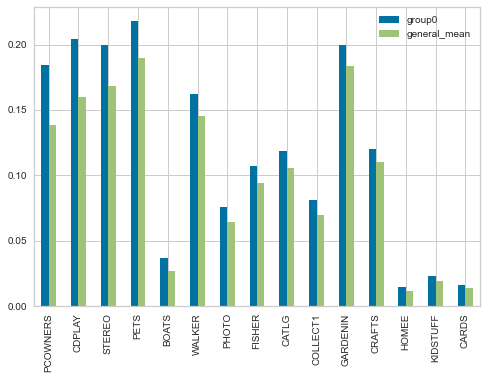

In [110]:
top_distinguishable_interests_group4 = p_values_4_interests[p_values_4_interests['p_values_group0'] <= 0.05].index

comparisson_table = pd.DataFrame(extended_data[extended_data['global_clusters']==4][top_distinguishable_interests_group4].mean(), columns = ['group0'])
comparisson_table['general_mean'] = extended_data[top_distinguishable_interests_group4].mean()
comparisson_table.plot.bar()

T-SNE

In [143]:
from sklearn.manifold import TSNE

tsne_data = pd.merge(left=all_data, right=interests, left_index=True, right_index=True)
tsne_data

,global_clusters,population_PC0,population_PC1,population_PC2,ethnicity_PC0,ethnicity_PC1,ethnicity_PC2,ethnicity_PC3,age_PC0,age_PC1,...,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
1,4,-0.502875,-0.041549,0.001666,0.113472,0.089578,-0.067811,0.364608,-0.093386,-0.200179,...,0,0,0,0,0,0,0,0,0,0
3,3,0.839277,-0.307164,-0.047493,0.226661,0.408289,0.052619,0.098131,-0.064637,0.061481,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.503624,-0.040291,-0.016821,1.460011,-0.387241,-0.086566,-0.144909,0.063102,-0.072991,...,0,0,1,0,1,0,1,0,1,0
6,3,0.498543,0.957287,-0.044350,-0.184912,-0.063548,0.083852,-0.020596,0.121967,-0.020355,...,1,0,0,0,0,0,0,0,0,0
11,4,-0.504227,-0.039397,-0.050376,-0.213336,-0.090004,0.083074,-0.008031,0.077498,0.156504,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,0,0.864255,-0.402423,-0.029174,-0.212721,-0.064093,-0.071653,-0.008332,-0.088736,-0.097634,...,0,0,0,0,0,0,0,0,0,0
95404,3,0.805718,-0.180854,0.126031,-0.189253,-0.076532,-0.070167,-0.014276,-0.069455,-0.092697,...,1,0,0,0,1,0,0,0,0,0
95406,3,0.861947,-0.410025,-0.026005,-0.042434,-0.060011,-0.019090,-0.006453,0.081644,-0.039193,...,0,0,0,0,0,0,0,0,0,0
95410,3,-0.503470,-0.040652,-0.029984,-0.120617,0.032490,-0.024631,0.024630,0.000446,-0.042582,...,0,0,0,0,0,0,0,0,0,0


In [144]:
model= TSNE(n_components=2 ,perplexity = tsne_data.shape[1], n_jobs=-1 )
tsne_output = TSNE().fit_transform(tsne_data)

In [145]:
x = tsne_output[:,0]
y = tsne_output[:,1]

<AxesSubplot:>

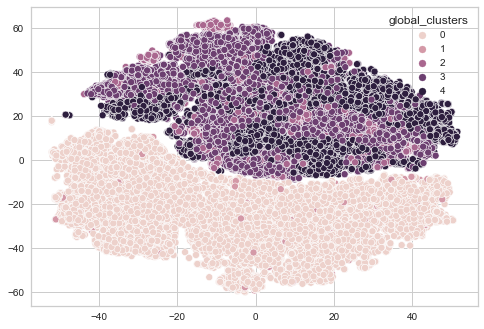

In [151]:
sns.scatterplot(x=x,y=y, hue=tsne_data['global_clusters'])

In [152]:
top_distinguishable_features_group0 + top_distinguishable_features_group1 + top_distinguishable_features_group2 + top_distinguishable_features_group3 + top_distinguishable_features_group4


Index(['income_PC0home_value_PC0home_value_PC0ethnicity_PC0income_PC0',
       'occupation_PC0renters_PC0renters_PC0marriage_PC1renters_PC0',
       'education_PC0income_PC1income_PC1renters_PC0education_PC0',
       'renters_PC0housing_units_PC1housing_units_PC1income_PC3occupation_PC0',
       'home_value_PC0occupation_PC0occupation_PC0ancestry_PC1employment_PC2',
       'employment_PC2income_PC0income_PC0transportation_PC0home_structures_PC1',
       'home_structures_PC1labor_force_PC0labor_force_PC0home_value_PC0population_PC0',
       'labor_force_PC1education_PC0education_PC0population_PC0home_value_PC0',
       'population_PC0ancestry_PC0ancestry_PC0families_PC1housing_units_PC1',
       'vehicles_PC0language_PC1language_PC1labor_force_PC3transportation_PC0'],
      dtype='object')